In [2]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Flatten, Input, concatenate, average, minimum, maximum, add
from keras.models import Model
from keras.optimizers import Adagrad

from sklearn import preprocessing

#Import another jupyter notebook
import import_ipynb
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval_lowercase, samEval, samEval_stopword, samEval_punctuation, samEval_lemma, samEval_bestpp, samEval_username

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath= 'outputs/05_preprocessing_samEval2018/'

In [ ]:
#Load necessary data with lowercasing
train_data_lower, train_labels_lower, test_data_lower, test_labels_lower, word_index_lower, MAX_SEQUENCE_LENGTH_lower = samEval_lowercase()

In [ ]:
#Load necessary data without stopwords
train_data_stopword, train_labels_stopword, test_data_stopword, test_labels_stopword, word_index_stopword, MAX_SEQUENCE_LENGTH_stopword = samEval_stopword()

In [ ]:
#Load necessary data without punctuation
train_data_punctuation, train_labels_punctuation, test_data_punctuation, test_labels_punctuation, word_index_punctuation, MAX_SEQUENCE_LENGTH_punctuation = samEval_punctuation()

In [ ]:
#Load necessary data with lemma
train_data_lemma, train_labels_lemma, test_data_lemma, test_labels_lemma, word_index_lemma, MAX_SEQUENCE_LENGTH_lemma = samEval_lemma()

In [4]:
#Load necessary data with best preprocessing
train_data_bestpp, train_labels_bestpp, test_data_bestpp, test_labels_bestpp, word_index_bestpp, MAX_SEQUENCE_LENGTH_bestpp = samEval_bestpp()

In [4]:
#Load necessary data with usermentions
train_data_username, train_labels_username, test_data_username, test_labels_username, word_index_username, MAX_SEQUENCE_LENGTH_username = samEval_username()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\Anja Tetzner\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\Users\Anja Tetzner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


#### POS Features

In [ ]:
def get_pos(file):
    pos =[]
    with open(file, 'r') as f:
        for line in f:
            pos.append([int(i) for i in line.split(',')])
    pos= np.asarray(pos)
    return pos

In [3]:
#Load POS data -lower
train_pos_lower =get_pos('output_trainTestData/SamEval_lower_train_pos.csv')
test_pos_lower = get_pos('output_trainTestData/SamEval_lower_test_pos.csv')

In [8]:
#Load POS data - stopword
train_pos_stopword =get_pos('output_trainTestData/SamEval_stopword_train_pos.csv')
test_pos_stopword = get_pos('output_trainTestData/SamEval_stopword_test_pos.csv')

In [22]:
#Load POS data - punctuation
train_pos_punctuation =get_pos('output_trainTestData/samEval_punctuation_train_pos.csv')
test_pos_punctuation = get_pos('output_trainTestData/samEval_punctuation_test_pos.csv')

In [7]:
#Load POS data - lemma
train_pos_lemma =get_pos('output_trainTestData/samEval_lemma_train_pos.csv')
test_pos_lemma = get_pos('output_trainTestData/samEval_lemma_test_pos.csv')

In [6]:
#Load POS data - bestpp
train_pos_bestpp =get_pos('output_trainTestData/samEval_bestpp_train_pos.csv')
test_pos_bestpp = get_pos('output_trainTestData/samEval_bestpp_test_pos.csv')

In [6]:
#Load POS data - username
train_pos_username =get_pos('output_trainTestData/samEval_username_train_pos.csv')
test_pos_username = get_pos('output_trainTestData/samEval_username_test_pos.csv')

#### Sentiment Features

In [ ]:
def get_sentiment(file):
    senti =[]
    with open(file, 'r') as f:
        for line in f:
            senti.append([float(i) for i in line.split(',')])
    senti= np.asarray(senti)
    return senti

In [9]:
#Load Sentiment data - lower
train_senti_blob_lower =get_sentiment('output_trainTestData/SamEval_lower_train_data_sentiment_blob.csv')
test_senti_blob_lower = get_sentiment('output_trainTestData/SamEval_lower_test_data_sentiment_blob.csv')

In [10]:
#Load Sentiment data - stopword
train_senti_blob_stopword =get_sentiment('output_trainTestData/SamEval_stopword_train_data_sentiment_blob.csv')
test_senti_blob_stopword = get_sentiment('output_trainTestData/SamEval_stopword_test_data_sentiment_blob.csv')

In [10]:
#Load Sentiment data - punctuation
train_senti_blob_punctuation =get_sentiment('output_trainTestData/samEval_punctuation_train_data_sentiment_blob.csv')
test_senti_blob_punctuation = get_sentiment('output_trainTestData/samEval_punctuation_test_data_sentiment_blob.csv')

In [8]:
#Load Sentiment data - lemma
train_senti_blob_lemma =get_sentiment('output_trainTestData/samEval_lemma_train_data_sentiment_blob.csv')
test_senti_blob_lemma = get_sentiment('output_trainTestData/samEval_lemma_test_data_sentiment_blob.csv')

In [7]:
#Load Sentiment data - bestpp
train_senti_blob_bestpp =get_sentiment('output_trainTestData/samEval_bestpp_train_data_sentiment_blob.csv')
test_senti_blob_bestpp = get_sentiment('output_trainTestData/samEval_bestpp_test_data_sentiment_blob.csv')

In [7]:
#Load Sentiment data - username
train_senti_blob_username =get_sentiment('output_trainTestData/samEval_username_train_data_sentiment_blob.csv')
test_senti_blob_username = get_sentiment('output_trainTestData/samEval_username_test_data_sentiment_blob.csv')

# Train the model

In [8]:
BATCH_SIZE = 64
NUM_EPOCHS = 30
softmax = True
lossfunction ='binary_crossentropy'
optimizer = Adagrad(lr=0.001)

## Lowercasing

In [ ]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix_lower = np.zeros((len(word_index_lower)+1, EMBEDDING_DIM))

for word, i in word_index_lower.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix_lower[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [14]:
#First part
wv_layer_lower = Embedding(len(word_index_lower)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_lower],
                 input_length=MAX_SEQUENCE_LENGTH_lower,
                 trainable=True)

comment_input_lower = Input(shape=(MAX_SEQUENCE_LENGTH_lower,), dtype='float32')
embedded_sequences_lower = wv_layer_lower(comment_input_lower)
x_first_lower = Dense(600, activation='relu')(embedded_sequences_lower)
x_first_lower = Flatten()(x_first_lower)

#Second part
senti_input_lower_blob = Input(shape=(MAX_SEQUENCE_LENGTH_lower,), dtype='float')
x_second_lower = Dense(600, activation='relu')(senti_input_lower_blob)

#Thrid part
senti_input_lower_pos = Input(shape=(MAX_SEQUENCE_LENGTH_lower,), dtype='float')
x_third_lower = Dense(600, activation='relu')(senti_input_lower_pos)

#Concatination
concat_lower = concatenate([x_first_lower, x_second_lower, x_third_lower])

preds_lower = Dense(2, activation='softmax')(concat_lower)

model_lower = Model(inputs=[comment_input_lower, senti_input_lower_blob, senti_input_lower_pos], outputs=preds_lower)
model_lower.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 40, 300)      3492600     input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 40, 600)      180600      embedding_2[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
input_3 (I


-----Fold 1--------


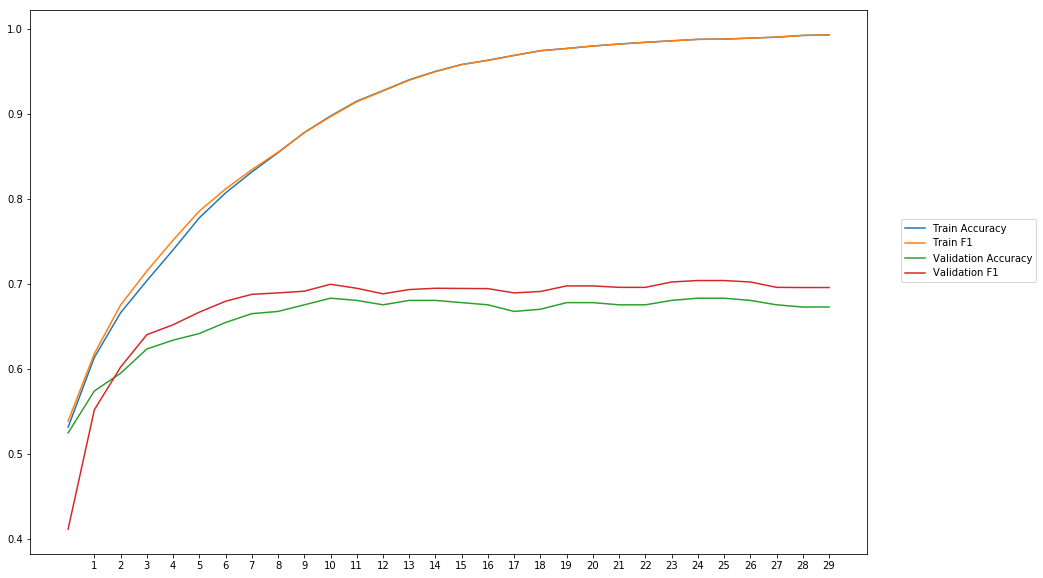

Average Accuracy: 66.00%
Average Precision: 64.20%
Average Recall: 71.11%
Average F1: 67.33%

-----Fold 2--------


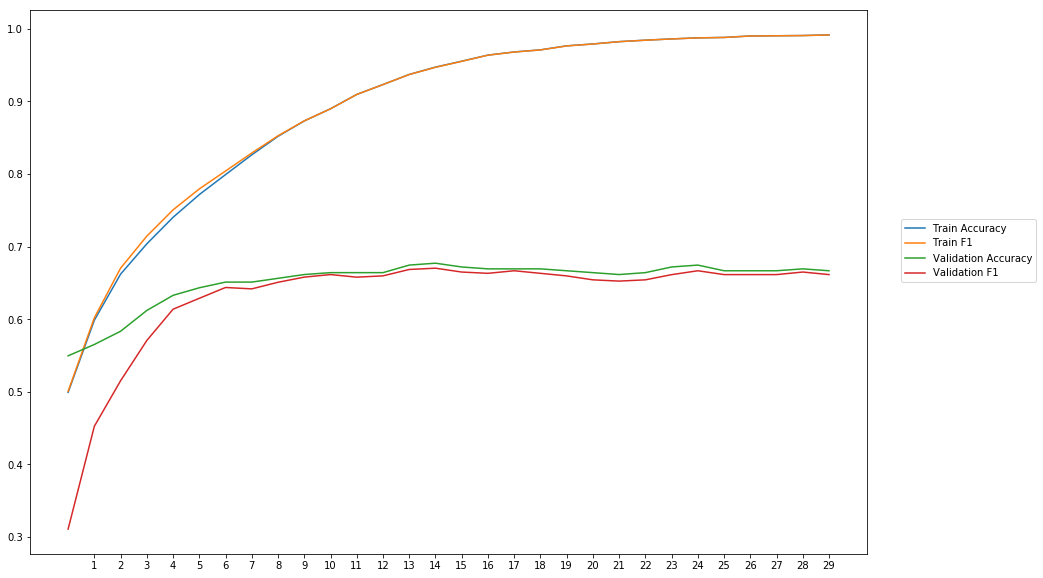

Average Accuracy: 65.23%
Average Precision: 66.16%
Average Recall: 61.12%
Average F1: 63.06%

-----Fold 3--------


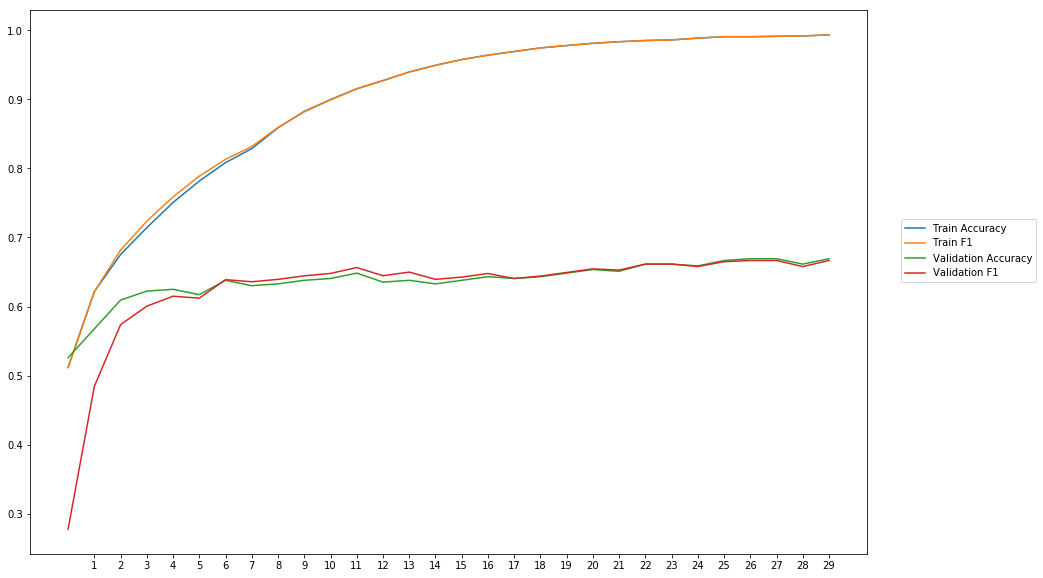

Average Accuracy: 63.79%
Average Precision: 63.74%
Average Recall: 62.43%
Average F1: 62.66%

-----Fold 4--------


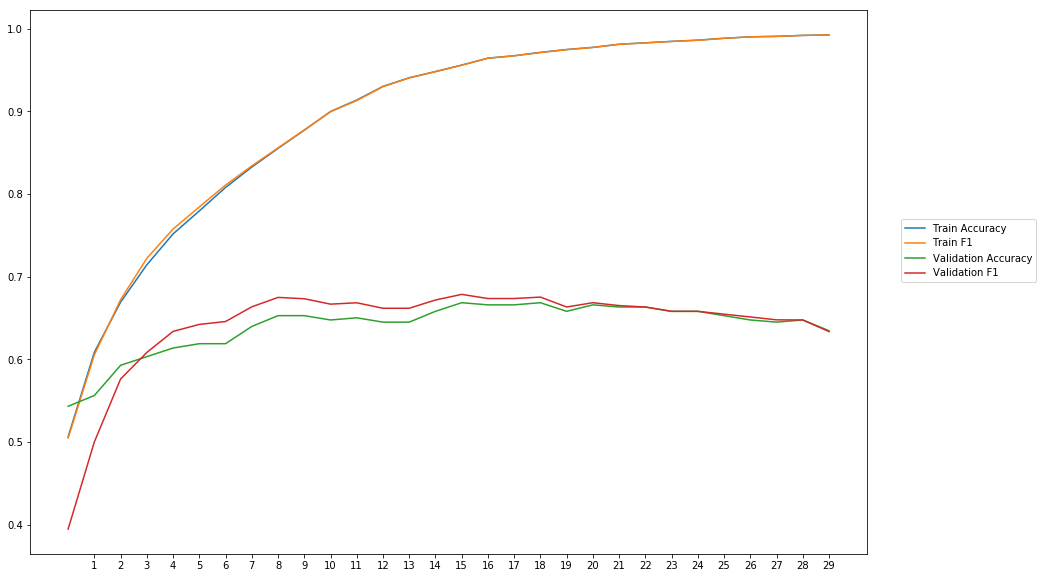

Average Accuracy: 63.99%
Average Precision: 63.35%
Average Recall: 65.55%
Average F1: 64.17%

-----Fold 5--------


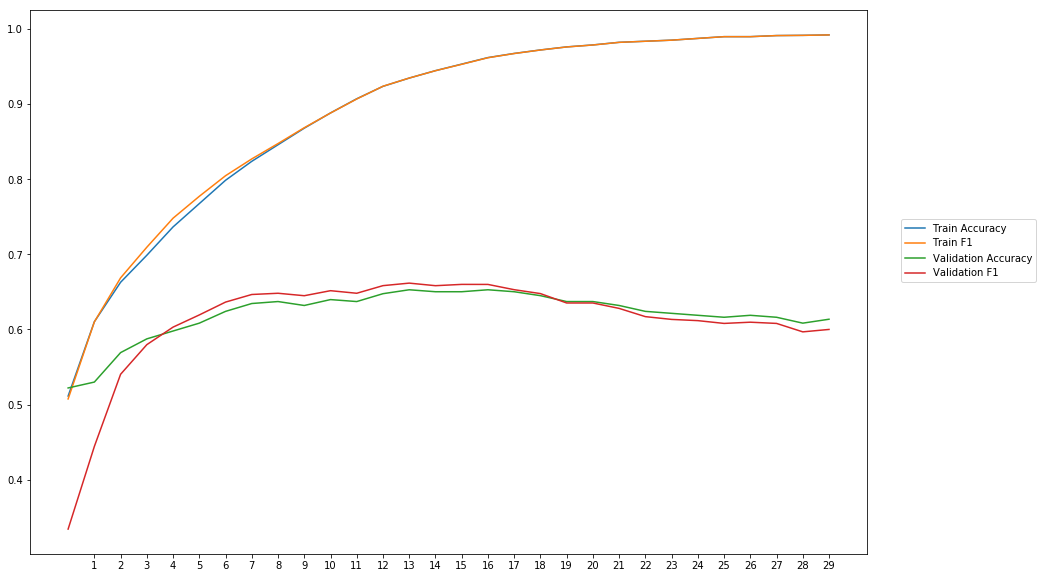

Average Accuracy: 62.04%
Average Precision: 61.89%
Average Recall: 61.08%
Average F1: 61.19%

-----Fold 6--------


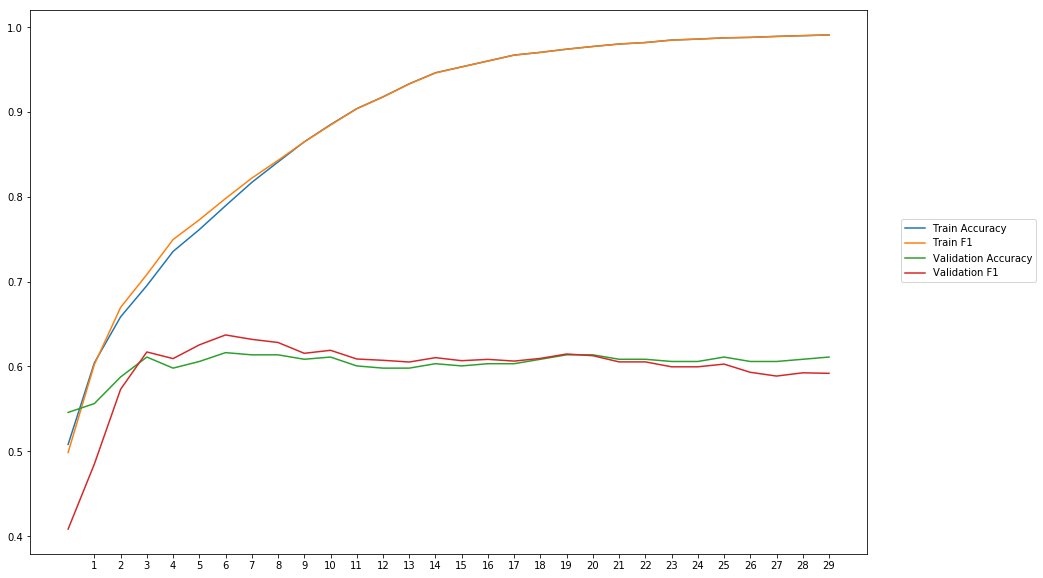

Average Accuracy: 60.26%
Average Precision: 60.23%
Average Recall: 59.65%
Average F1: 59.72%

-----Fold 7--------


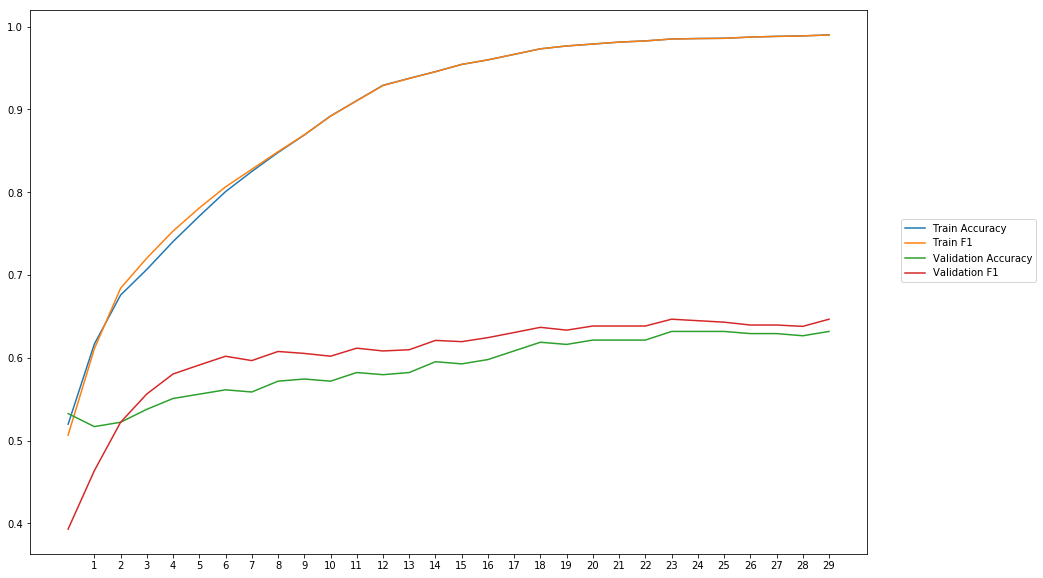

Average Accuracy: 59.02%
Average Precision: 58.13%
Average Recall: 63.44%
Average F1: 60.43%

-----Fold 8--------


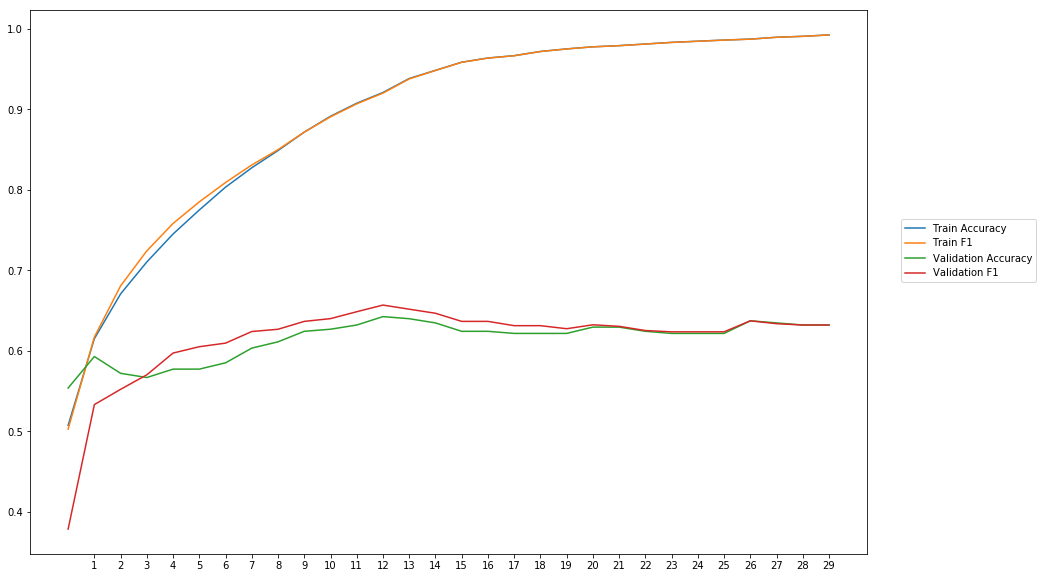

Average Accuracy: 61.44%
Average Precision: 61.17%
Average Recall: 62.34%
Average F1: 61.43%

-----Fold 9--------


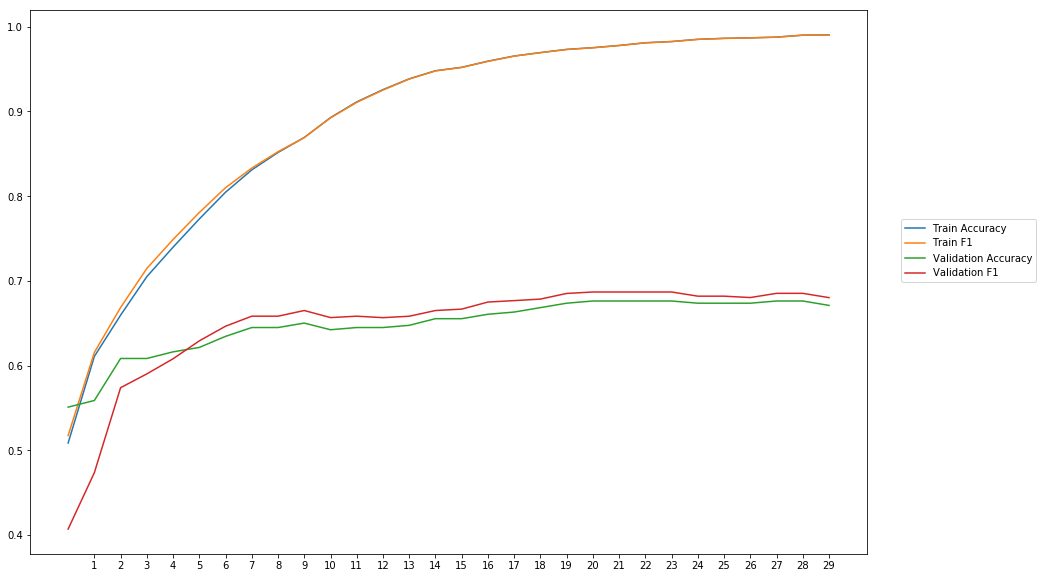

Average Accuracy: 64.81%
Average Precision: 64.19%
Average Recall: 65.93%
Average F1: 64.76%

-----Fold 10--------


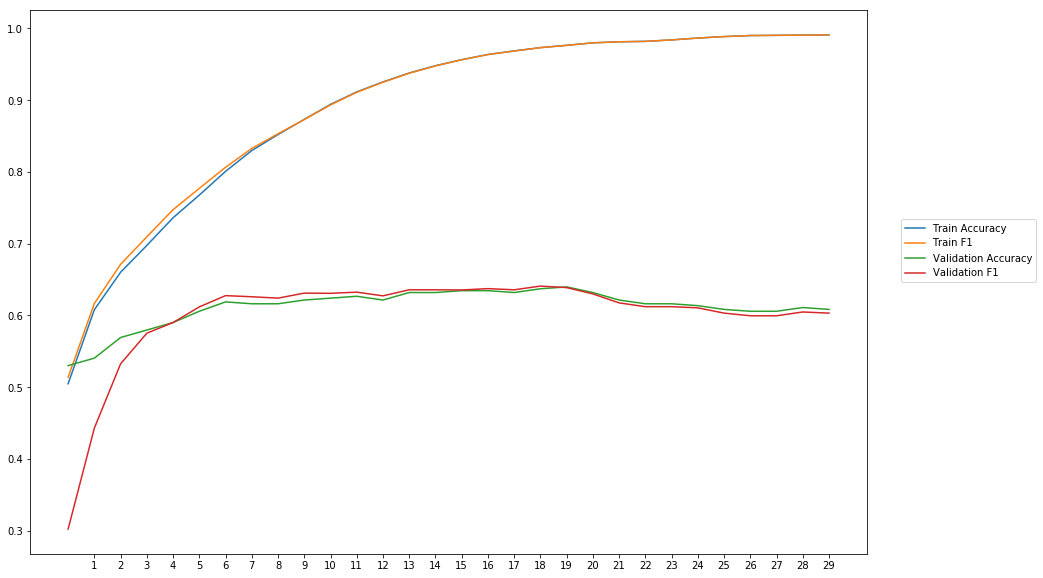

Average Accuracy: 61.13%
Average Precision: 61.19%
Average Recall: 59.63%
Average F1: 60.02%

-------Overallresults-------


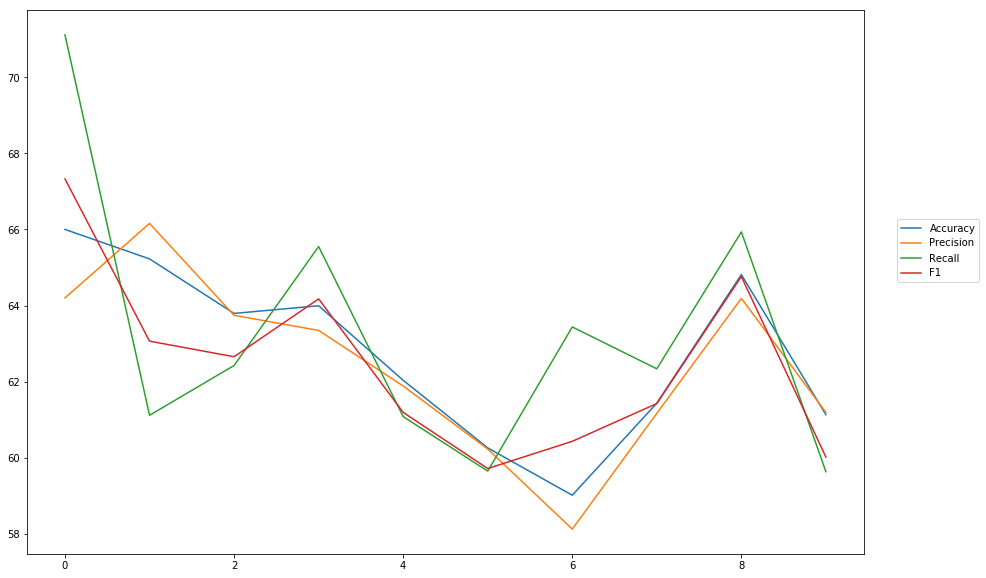

Accuracy: Mean = 62.77% (+/- 2.20%), Max = 66.00%, Min =  59.02%
Precision: Mean = 62.42% (+/- 2.22%), Max = 66.16%, Min =  58.13%
Recall: Mean = 63.23% (+/- 3.33%), Max = 71.11%, Min =  59.63%
F1: Mean = 62.48% (+/- 2.29%), Max = 67.33%, Min =  59.72%


In [15]:
cross_val_three_inputs(model_lower, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data_lower, train_senti_blob_lower, train_pos_lower, train_labels_lower, softmax, outputpath, 'lowercasing')

## Removed Stopwords

In [16]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix_stopword = np.zeros((len(word_index_stopword)+1, EMBEDDING_DIM))

for word, i in word_index_stopword.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix_stopword[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [17]:
#First part
wv_layer_stopword = Embedding(len(word_index_stopword)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_stopword],
                 input_length=MAX_SEQUENCE_LENGTH_stopword,
                 trainable=True)

comment_input_stopword = Input(shape=(MAX_SEQUENCE_LENGTH_stopword,), dtype='float32')
embedded_sequences_stopword = wv_layer_stopword(comment_input_stopword)
x_first_stopword = Dense(600, activation='relu')(embedded_sequences_stopword)
x_first_stopword = Flatten()(x_first_stopword)

#Second part
senti_input_stopword_blob = Input(shape=(MAX_SEQUENCE_LENGTH_stopword,), dtype='float')
x_second_stopword = Dense(600, activation='relu')(senti_input_stopword_blob)

#Thrid part
senti_input_stopword_pos = Input(shape=(MAX_SEQUENCE_LENGTH_stopword,), dtype='float')
x_third_stopword = Dense(600, activation='relu')(senti_input_stopword_pos)

#Concatination
concat_stopword = concatenate([x_first_stopword, x_second_stopword, x_third_stopword])

preds_stopword = Dense(2, activation='softmax')(concat_stopword)

model_stopword = Model(inputs=[comment_input_stopword, senti_input_stopword_blob, senti_input_stopword_pos], outputs=preds_stopword)
model_stopword.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 33)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 33, 300)      4073400     input_4[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 33, 600)      180600      embedding_3[0][0]                
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 33)           0                                            
__________________________________________________________________________________________________
input_6 (I


-----Fold 1--------


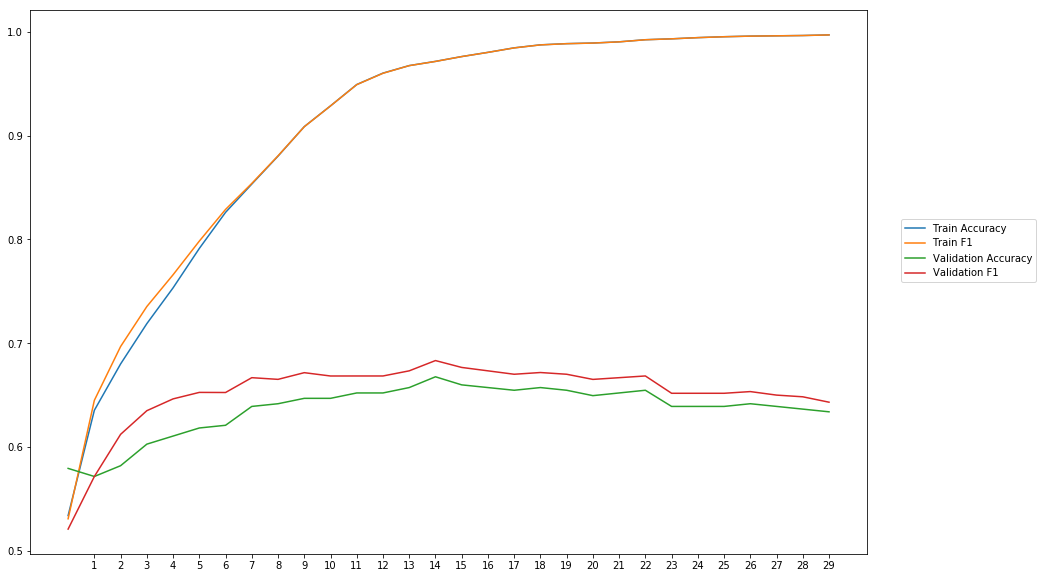

Average Accuracy: 63.65%
Average Precision: 62.32%
Average Recall: 68.59%
Average F1: 65.22%

-----Fold 2--------


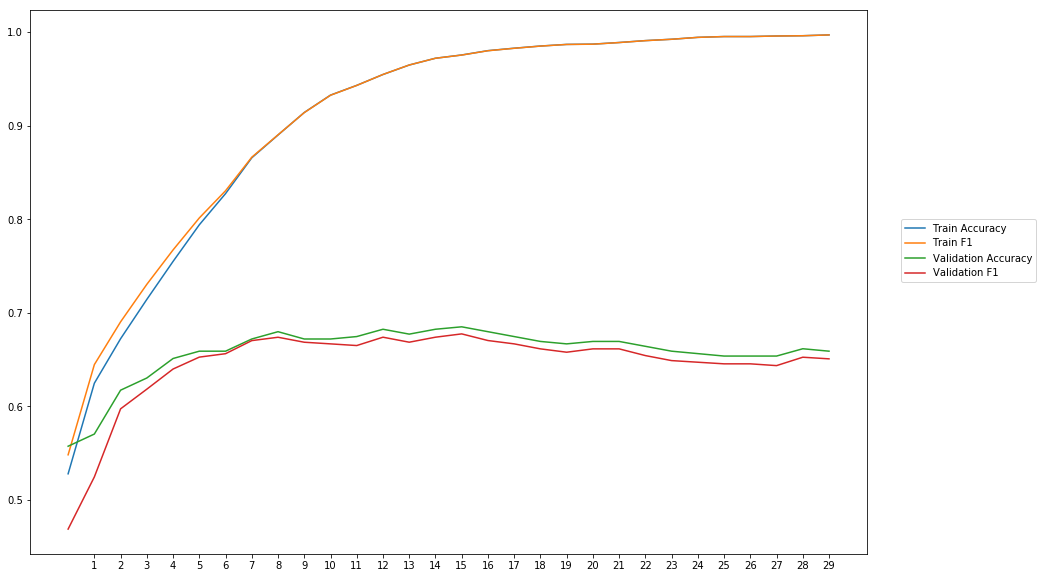

Average Accuracy: 65.76%
Average Precision: 66.31%
Average Recall: 62.97%
Average F1: 64.53%

-----Fold 3--------


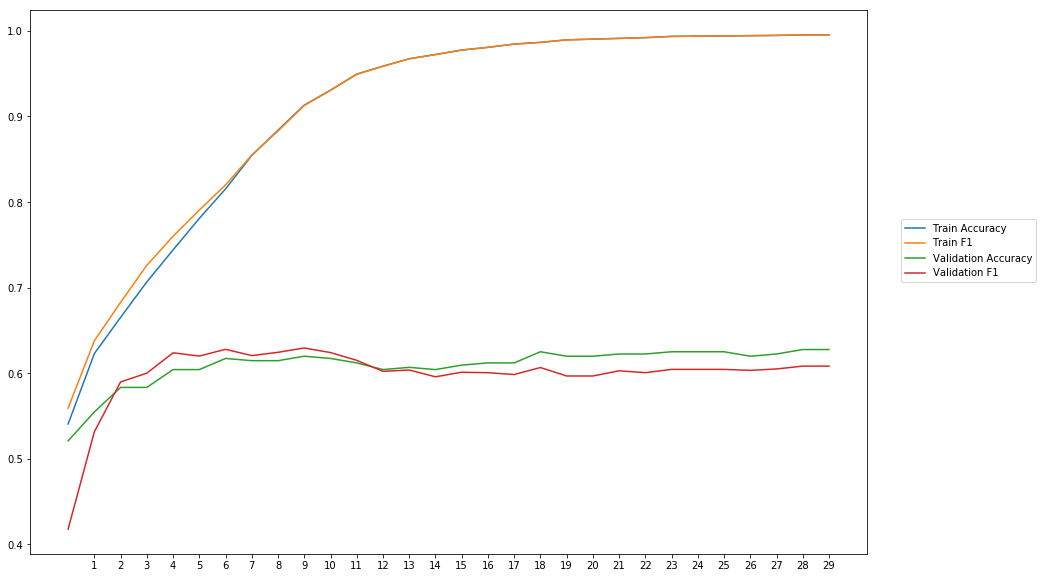

Average Accuracy: 60.92%
Average Precision: 61.11%
Average Recall: 58.97%
Average F1: 59.89%

-----Fold 4--------


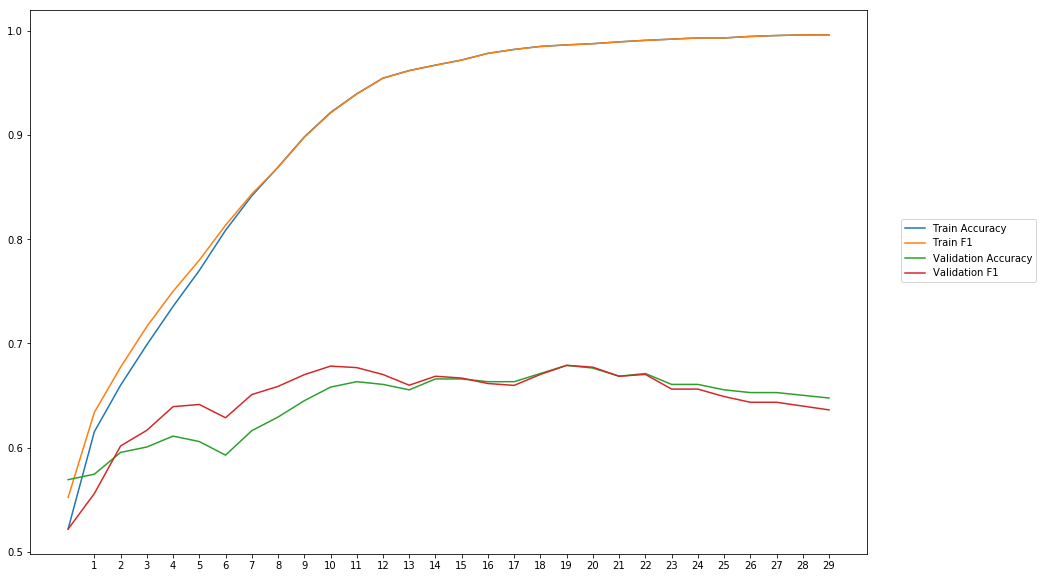

Average Accuracy: 64.26%
Average Precision: 63.83%
Average Recall: 65.88%
Average F1: 64.71%

-----Fold 5--------


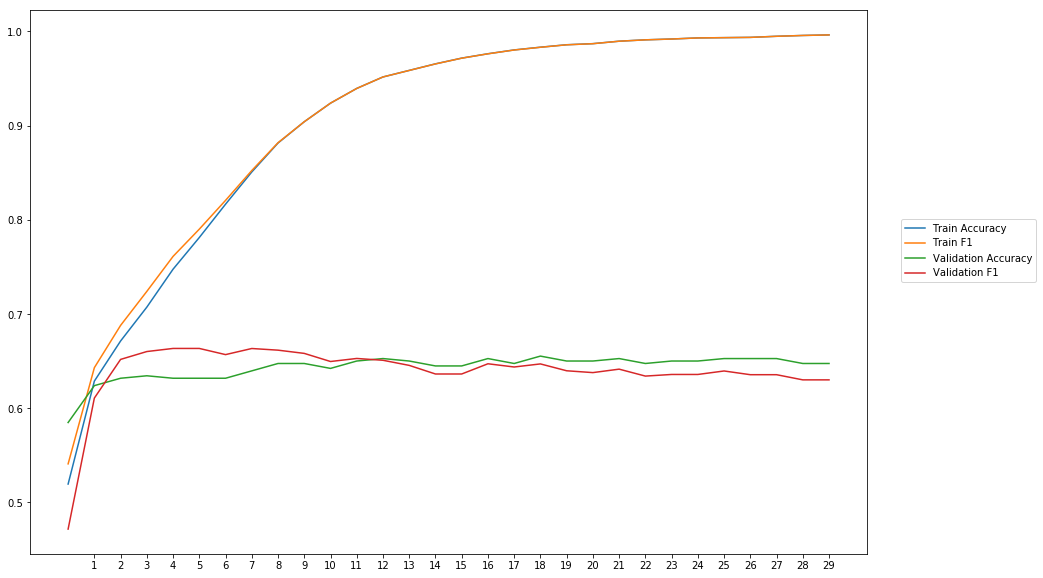

Average Accuracy: 64.33%
Average Precision: 64.54%
Average Recall: 63.73%
Average F1: 63.89%

-----Fold 6--------


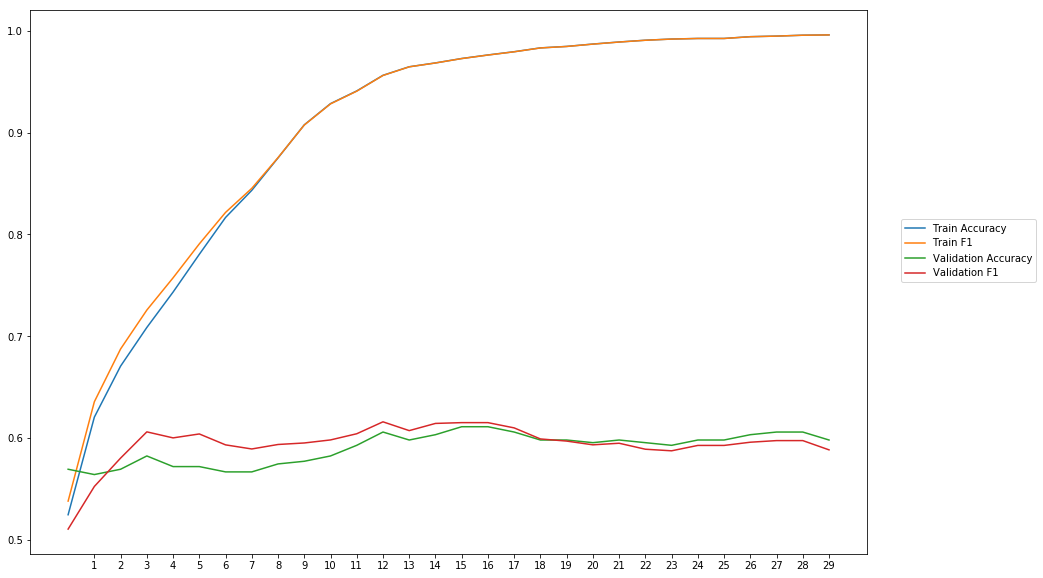

Average Accuracy: 59.03%
Average Precision: 58.76%
Average Recall: 60.28%
Average F1: 59.42%

-----Fold 7--------


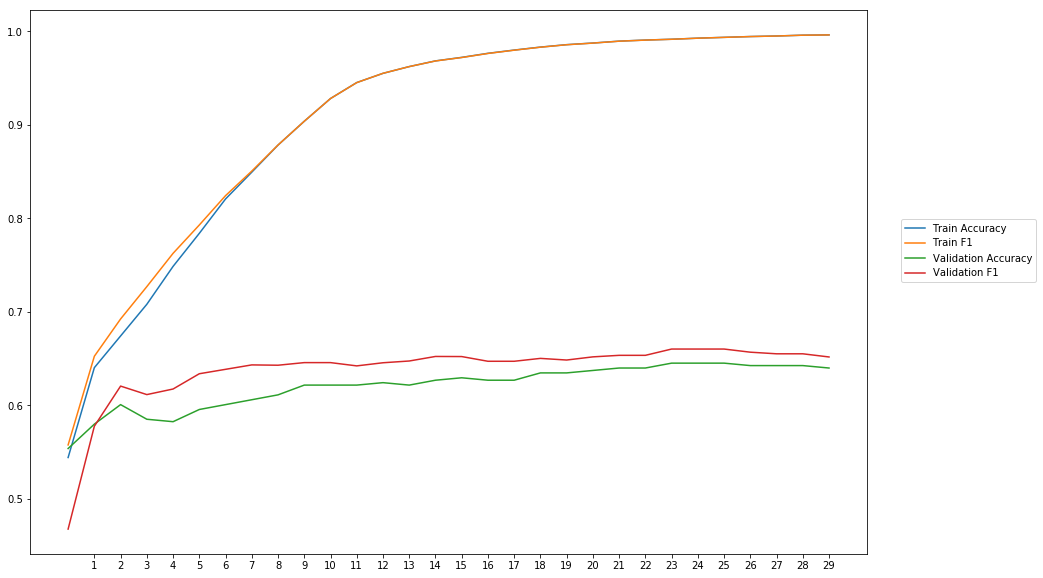

Average Accuracy: 62.06%
Average Precision: 60.82%
Average Recall: 67.28%
Average F1: 63.76%

-----Fold 8--------


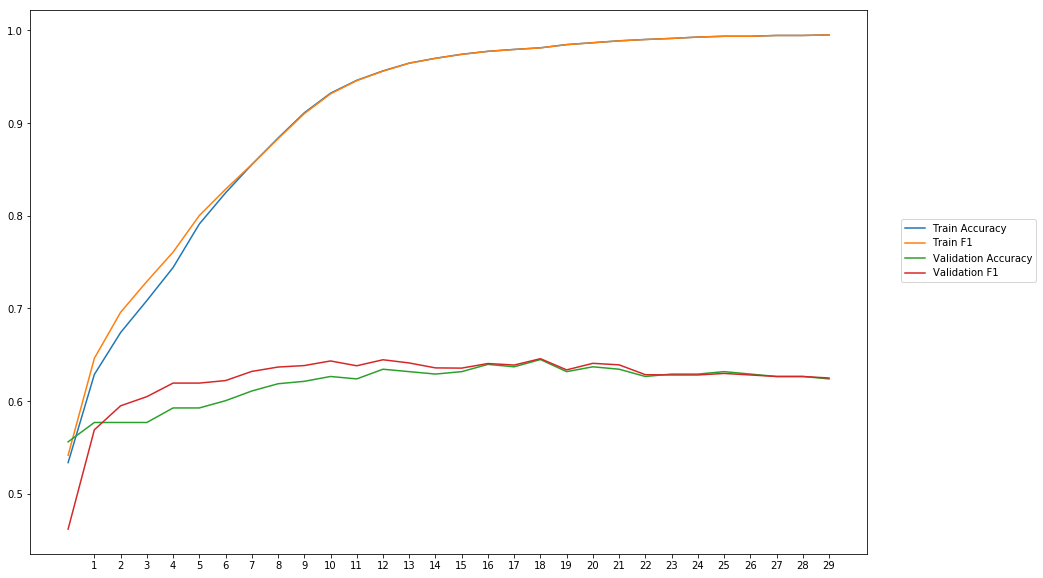

Average Accuracy: 61.84%
Average Precision: 61.35%
Average Recall: 63.60%
Average F1: 62.33%

-----Fold 9--------


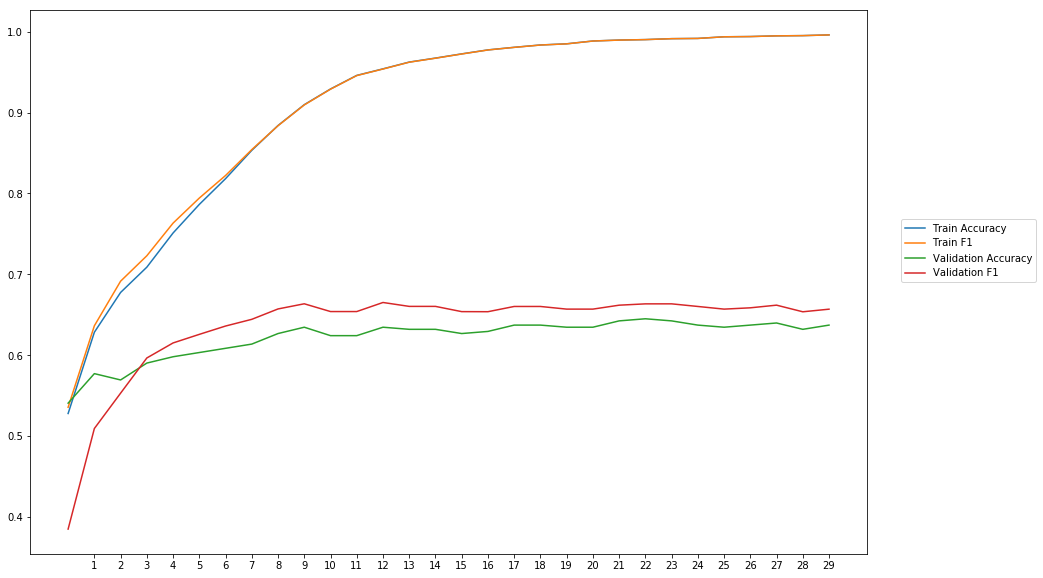

Average Accuracy: 62.18%
Average Precision: 60.88%
Average Recall: 67.12%
Average F1: 63.52%

-----Fold 10--------


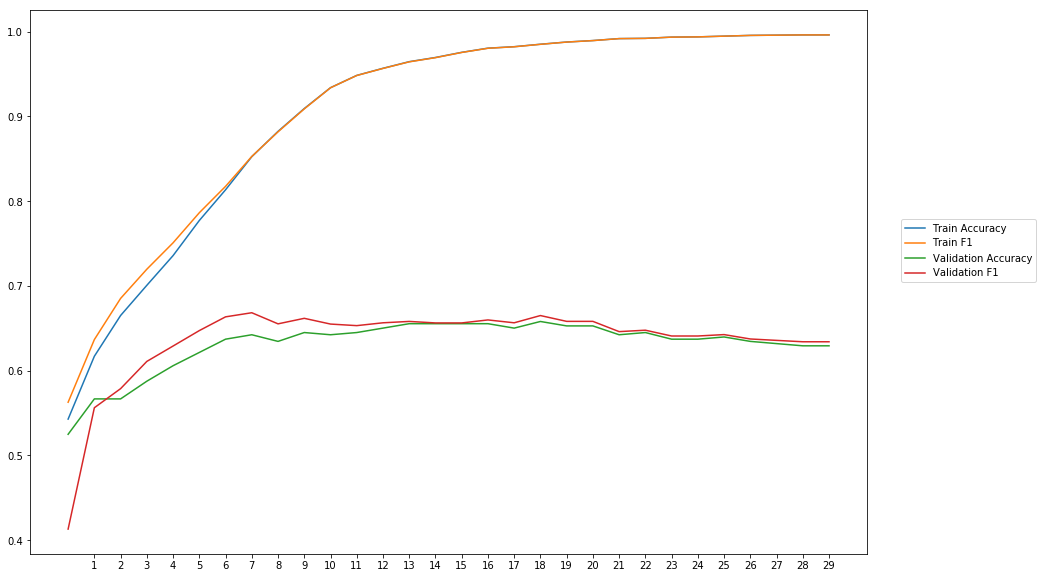

Average Accuracy: 63.10%
Average Precision: 62.40%
Average Recall: 65.08%
Average F1: 63.58%

-------Overallresults-------


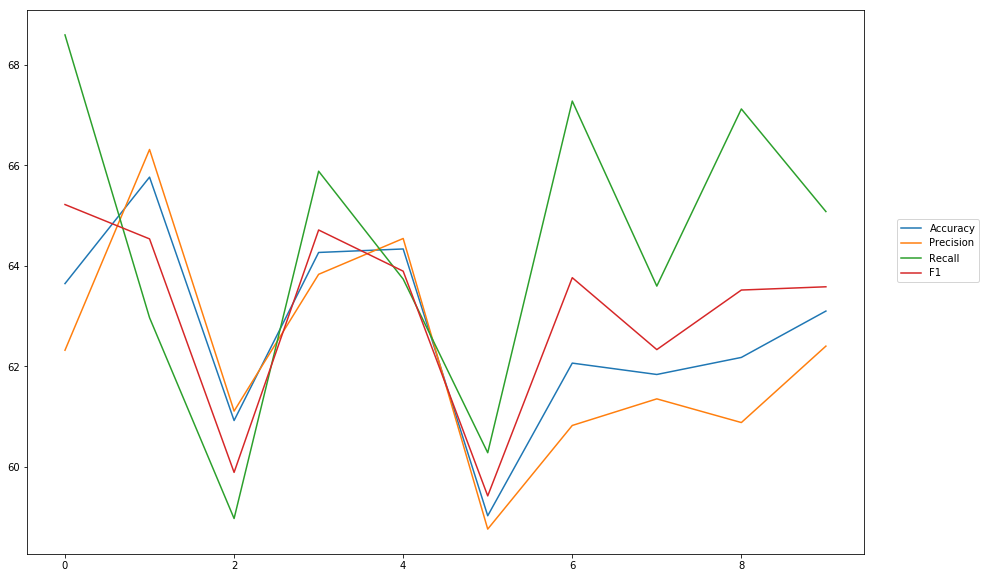

Accuracy: Mean = 62.71% (+/- 1.83%), Max = 65.76%, Min =  59.03%
Precision: Mean = 62.23% (+/- 2.06%), Max = 66.31%, Min =  58.76%
Recall: Mean = 64.35% (+/- 2.92%), Max = 68.59%, Min =  58.97%
F1: Mean = 63.09% (+/- 1.87%), Max = 65.22%, Min =  59.42%


In [18]:
cross_val_three_inputs(model_stopword, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data_stopword, train_senti_blob_stopword, train_pos_stopword, train_labels_stopword, softmax, outputpath, 'stopwordcasing')

## Removed punctiation

In [12]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix_punctuation = np.zeros((len(word_index_punctuation)+1, EMBEDDING_DIM))

for word, i in word_index_punctuation.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix_punctuation[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [13]:
#First part
wv_layer_punctuation = Embedding(len(word_index_punctuation)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_punctuation],
                 input_length=MAX_SEQUENCE_LENGTH_punctuation,
                 trainable=True)

comment_input_punctuation = Input(shape=(MAX_SEQUENCE_LENGTH_punctuation,), dtype='float32')
embedded_sequences_punctuation = wv_layer_punctuation(comment_input_punctuation)
x_first_punctuation = Dense(600, activation='relu')(embedded_sequences_punctuation)
x_first_punctuation = Flatten()(x_first_punctuation)

#Second part
senti_input_punctuation_blob = Input(shape=(MAX_SEQUENCE_LENGTH_punctuation,), dtype='float')
x_second_punctuation = Dense(600, activation='relu')(senti_input_punctuation_blob)

#Thrid part
senti_input_punctuation_pos = Input(shape=(MAX_SEQUENCE_LENGTH_punctuation,), dtype='float')
x_third_punctuation = Dense(600, activation='relu')(senti_input_punctuation_pos)

#Concatination
concat_punctuation = concatenate([x_first_punctuation, x_second_punctuation, x_third_punctuation])

preds_punctuation = Dense(2, activation='softmax')(concat_punctuation)

model_punctuation = Model(inputs=[comment_input_punctuation, senti_input_punctuation_blob, senti_input_punctuation_pos], outputs=preds_punctuation)
model_punctuation.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 32, 300)      89700       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32, 600)      180600      embedding_1[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
input_3 (I


-----Fold 1--------


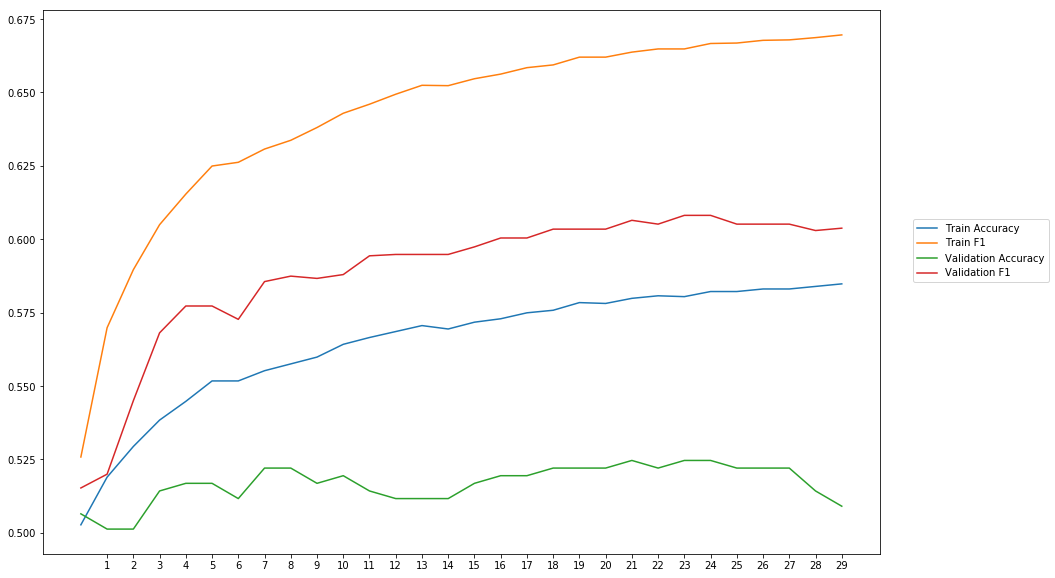

Average Accuracy: 51.69%
Average Precision: 51.13%
Average Recall: 69.62%
Average F1: 58.87%

-----Fold 2--------


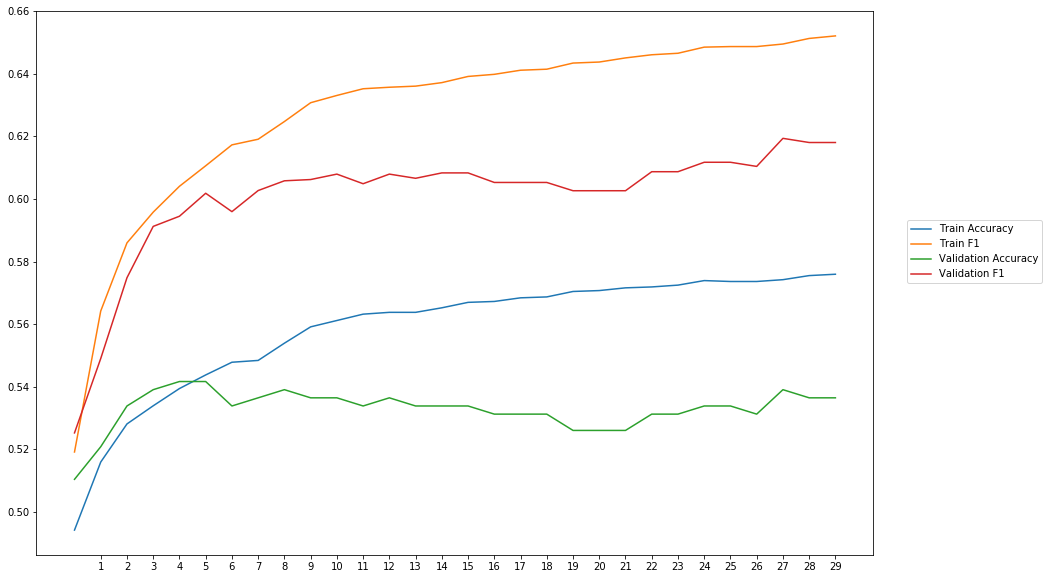

Average Accuracy: 53.29%
Average Precision: 52.24%
Average Recall: 70.84%
Average F1: 60.07%

-----Fold 3--------


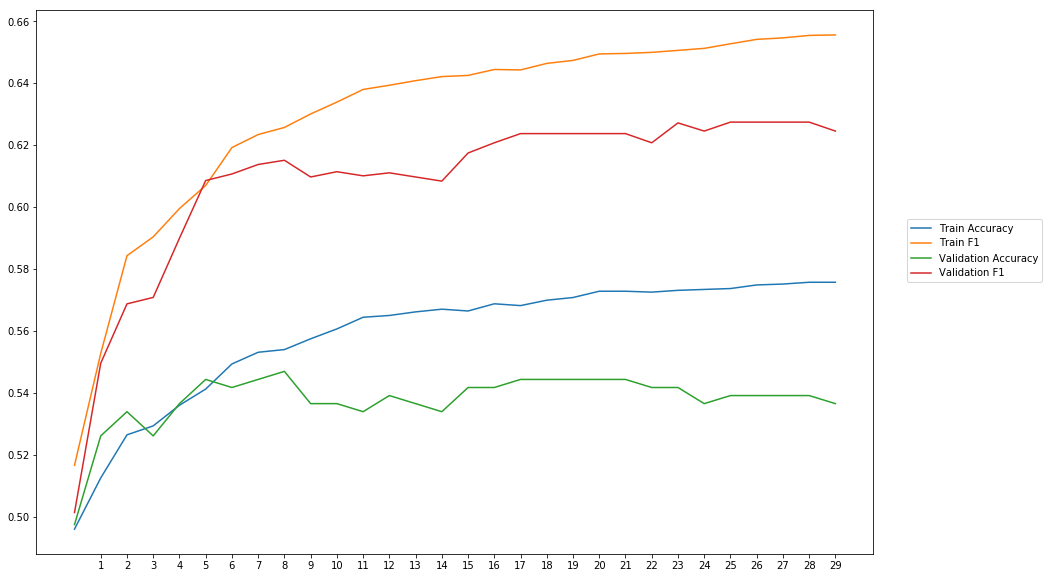

Average Accuracy: 53.77%
Average Precision: 52.52%
Average Recall: 72.57%
Average F1: 60.84%

-----Fold 4--------


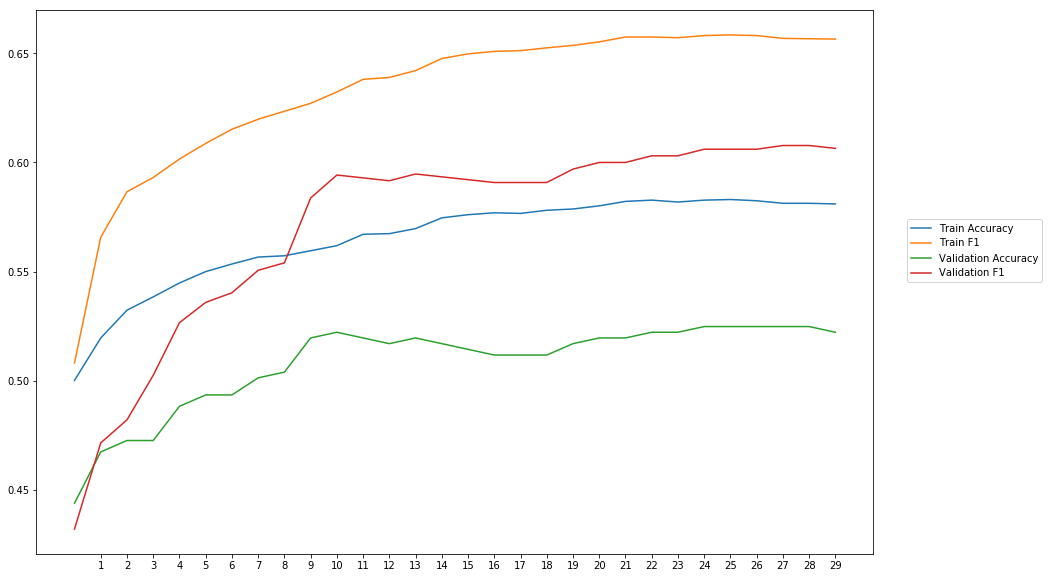

Average Accuracy: 50.83%
Average Precision: 50.36%
Average Recall: 66.54%
Average F1: 57.18%

-----Fold 5--------


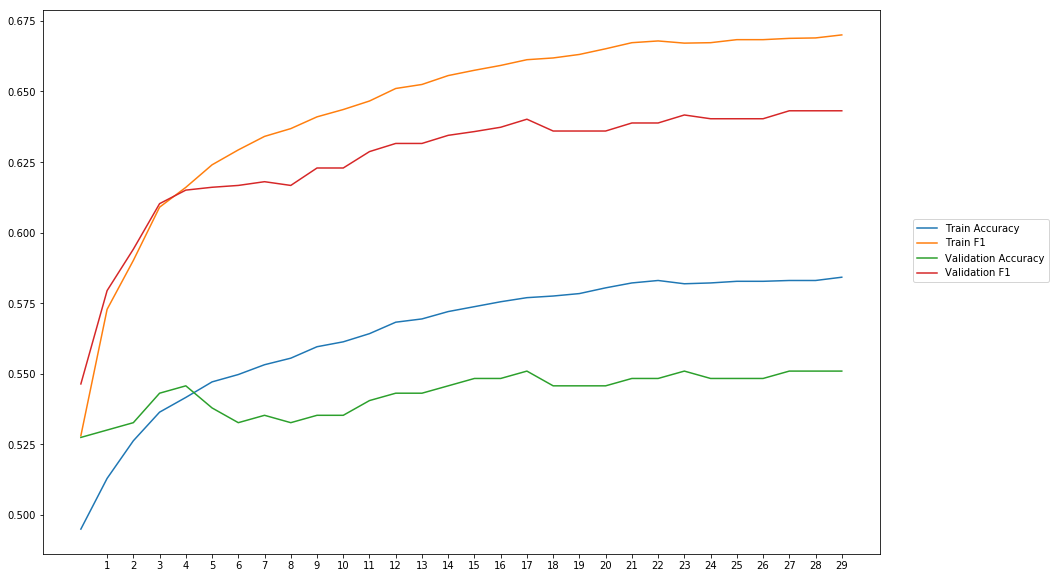

Average Accuracy: 54.30%
Average Precision: 52.86%
Average Recall: 76.91%
Average F1: 62.59%

-----Fold 6--------


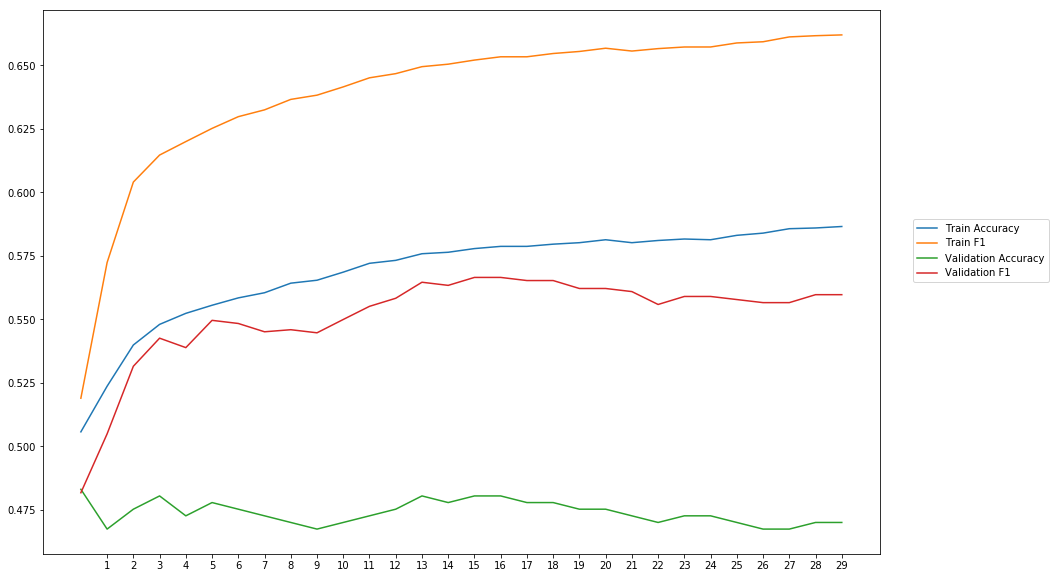

Average Accuracy: 47.39%
Average Precision: 47.97%
Average Recall: 64.96%
Average F1: 55.12%

-----Fold 7--------


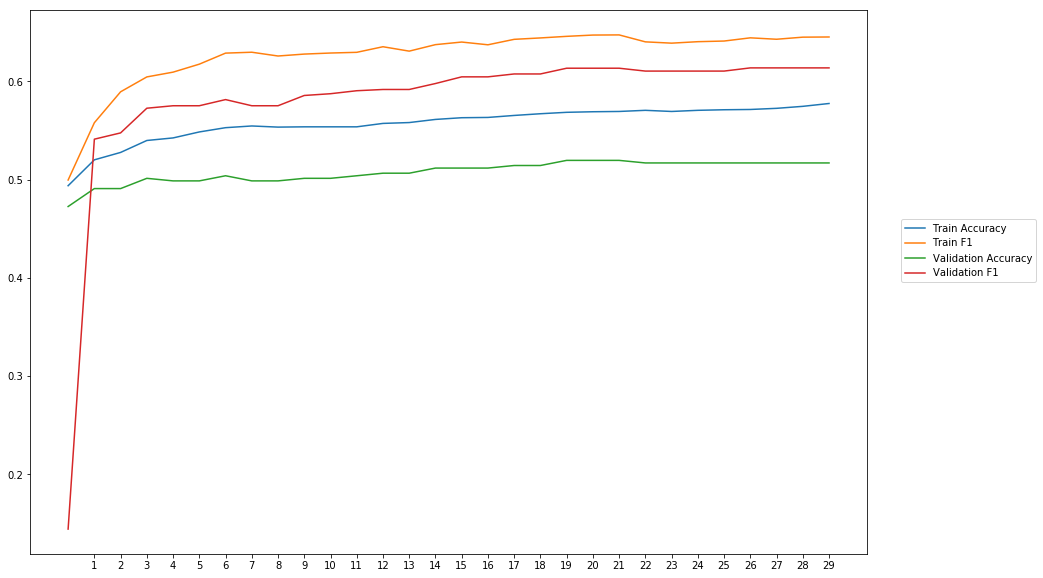

Average Accuracy: 50.77%
Average Precision: 50.08%
Average Recall: 70.35%
Average F1: 57.98%

-----Fold 8--------


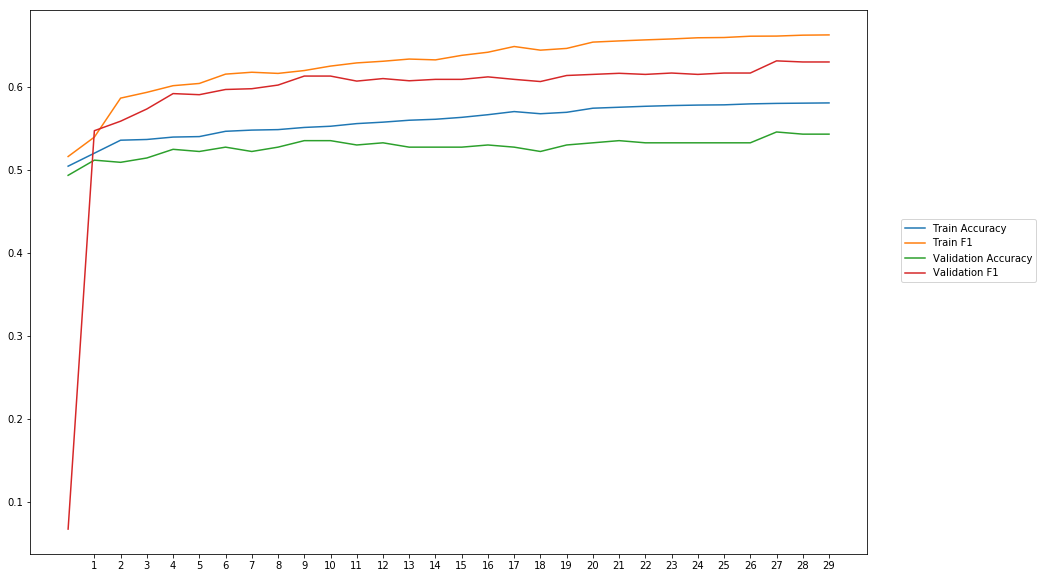

Average Accuracy: 52.80%
Average Precision: 51.62%
Average Recall: 70.44%
Average F1: 58.80%

-----Fold 9--------


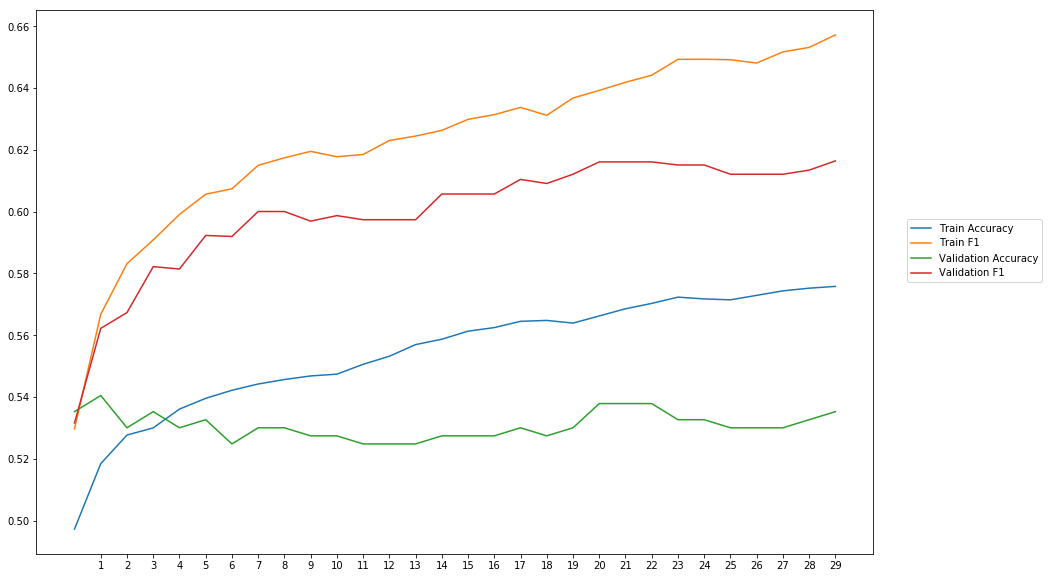

Average Accuracy: 53.08%
Average Precision: 52.21%
Average Recall: 70.70%
Average F1: 59.96%

-----Fold 10--------


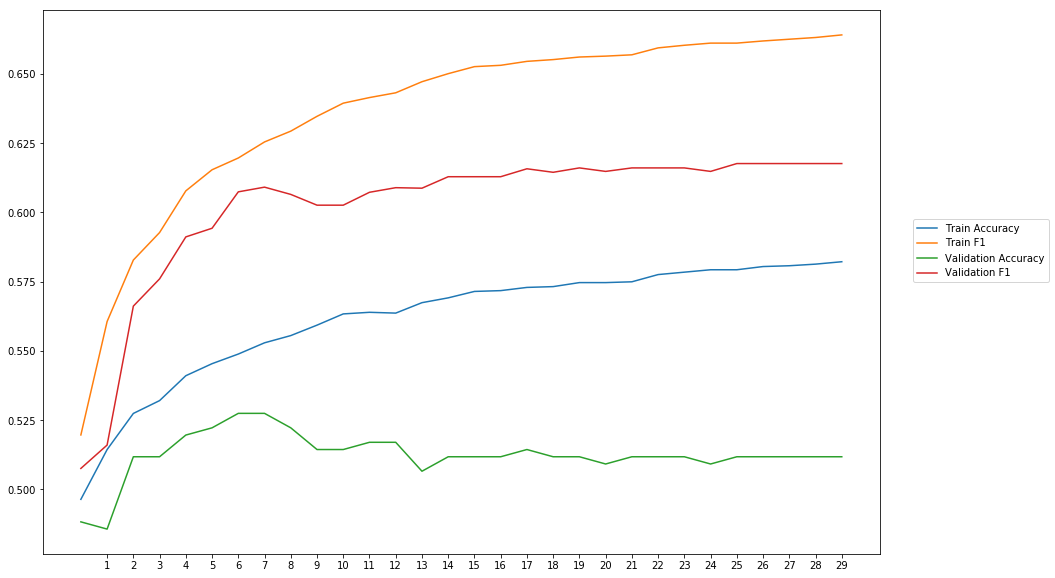

Average Accuracy: 51.24%
Average Precision: 50.73%
Average Recall: 74.29%
Average F1: 60.18%

-------Overallresults-------


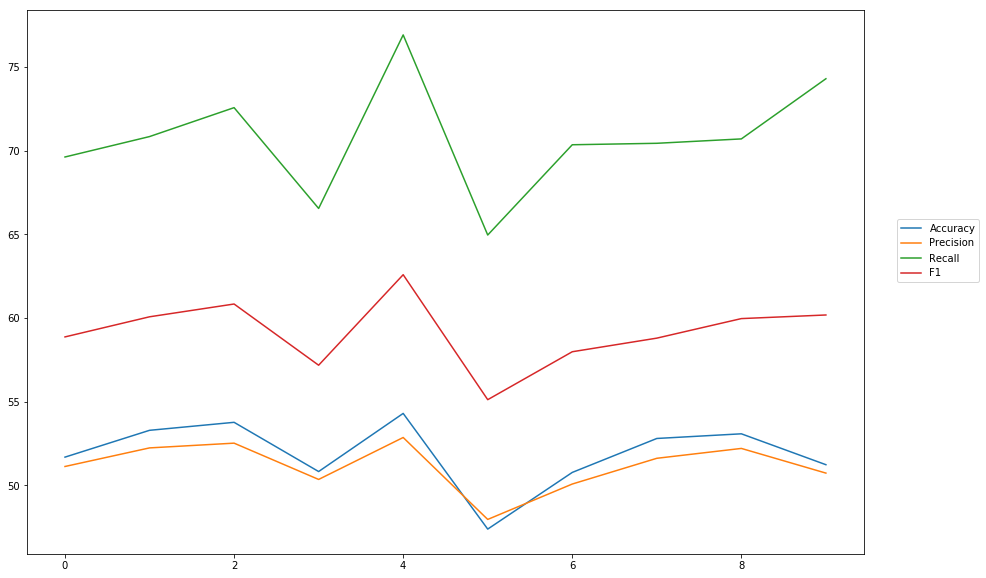

Accuracy: Mean = 51.92% (+/- 1.91%), Max = 54.30%, Min =  47.39%
Precision: Mean = 51.17% (+/- 1.39%), Max = 52.86%, Min =  47.97%
Recall: Mean = 70.72% (+/- 3.27%), Max = 76.91%, Min =  64.96%
F1: Mean = 59.16% (+/- 1.97%), Max = 62.59%, Min =  55.12%


In [23]:
cross_val_three_inputs(model_punctuation, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data_punctuation, train_senti_blob_punctuation, train_pos_punctuation, train_labels_punctuation, softmax, outputpath, 'punctuationsRemoved')

## Lemmatization

In [10]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix_lemma = np.zeros((len(word_index_lemma)+1, EMBEDDING_DIM))

for word, i in word_index_lemma.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix_lemma[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [11]:
#First part
wv_layer_lemma = Embedding(len(word_index_lemma)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_lemma],
                 input_length=MAX_SEQUENCE_LENGTH_lemma,
                 trainable=True)

comment_input_lemma = Input(shape=(MAX_SEQUENCE_LENGTH_lemma,), dtype='float32')
embedded_sequences_lemma = wv_layer_lemma(comment_input_lemma)
x_first_lemma = Dense(600, activation='relu')(embedded_sequences_lemma)
x_first_lemma = Flatten()(x_first_lemma)

#Second part
senti_input_lemma_blob = Input(shape=(MAX_SEQUENCE_LENGTH_lemma,), dtype='float')
x_second_lemma = Dense(600, activation='relu')(senti_input_lemma_blob)

#Thrid part
senti_input_lemma_pos = Input(shape=(MAX_SEQUENCE_LENGTH_lemma,), dtype='float')
x_third_lemma = Dense(600, activation='relu')(senti_input_lemma_pos)

#Concatination
concat_lemma = concatenate([x_first_lemma, x_second_lemma, x_third_lemma])

preds_lemma = Dense(2, activation='softmax')(concat_lemma)

model_lemma = Model(inputs=[comment_input_lemma, senti_input_lemma_blob, senti_input_lemma_pos], outputs=preds_lemma)
model_lemma.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 300)      300         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 40, 600)      180600      embedding_1[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
input_3 (I


-----Fold 1--------


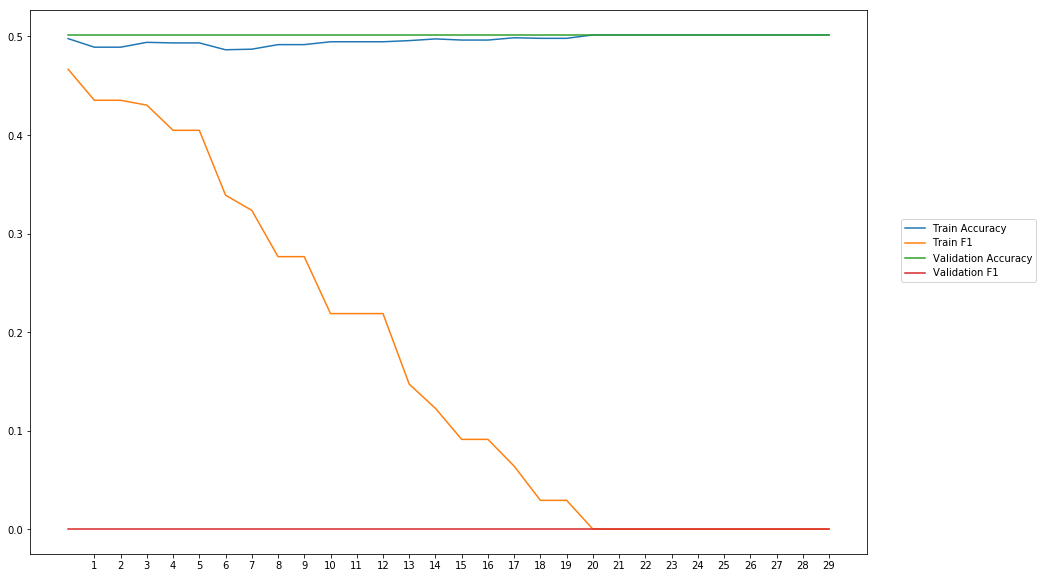

Average Accuracy: 50.13%
Average Precision: 0.00%
Average Recall: 0.00%
Average F1: 0.00%

-----Fold 2--------


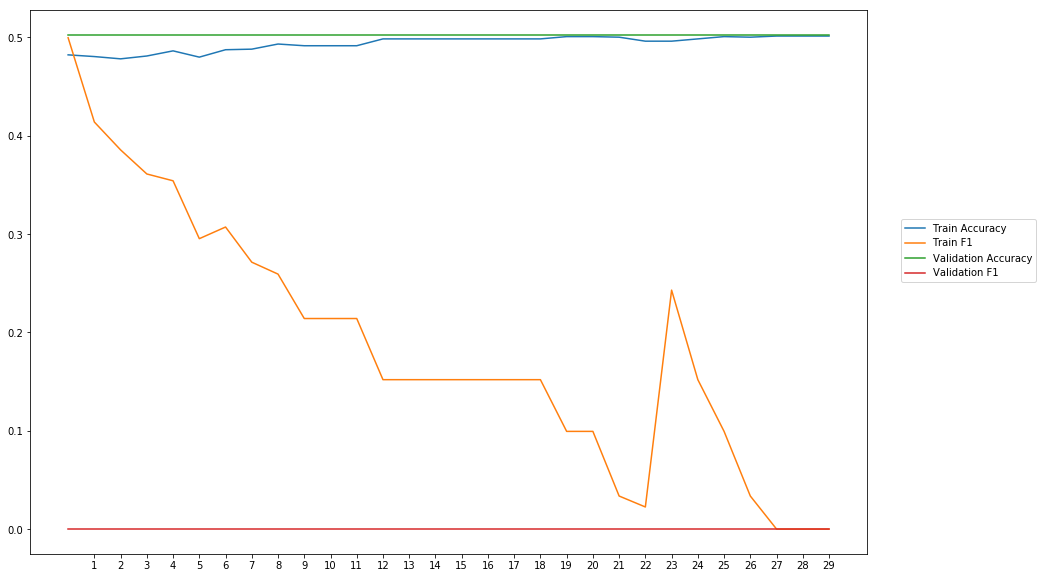

Average Accuracy: 50.26%
Average Precision: 0.00%
Average Recall: 0.00%
Average F1: 0.00%

-----Fold 3--------


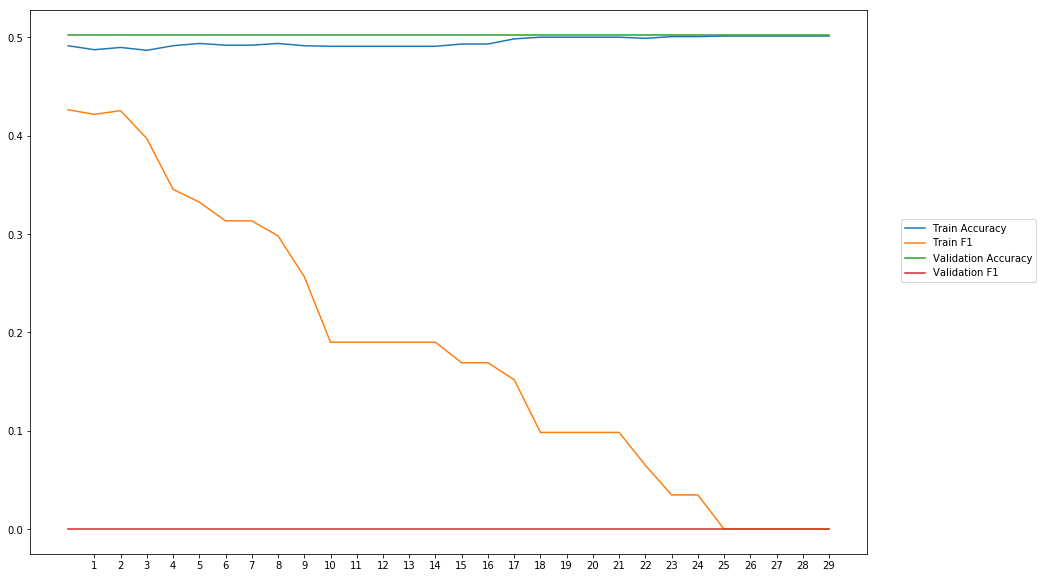

Average Accuracy: 50.26%
Average Precision: 0.00%
Average Recall: 0.00%
Average F1: 0.00%

-----Fold 4--------


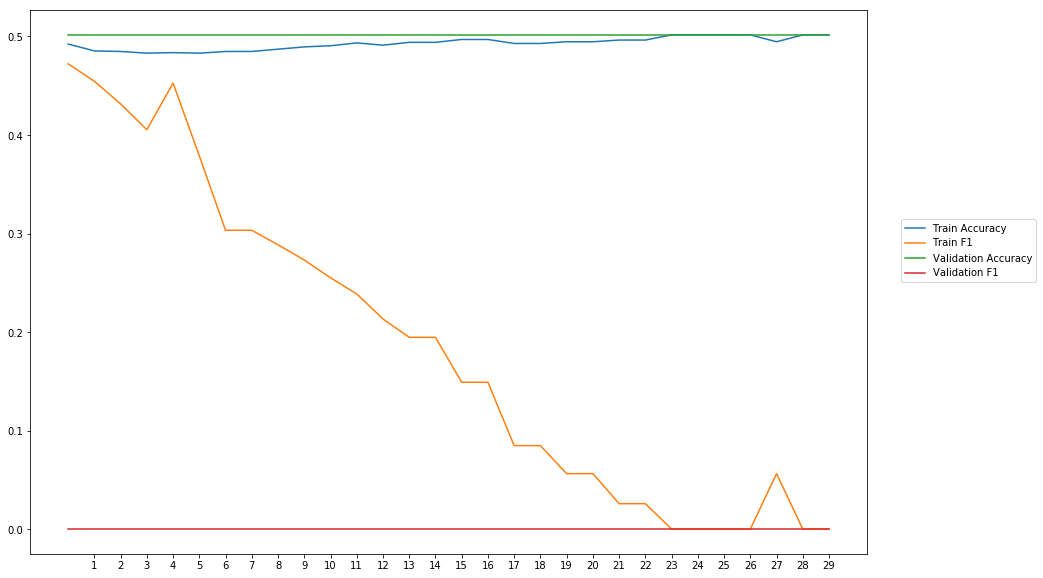

Average Accuracy: 50.13%
Average Precision: 0.00%
Average Recall: 0.00%
Average F1: 0.00%

-----Fold 5--------


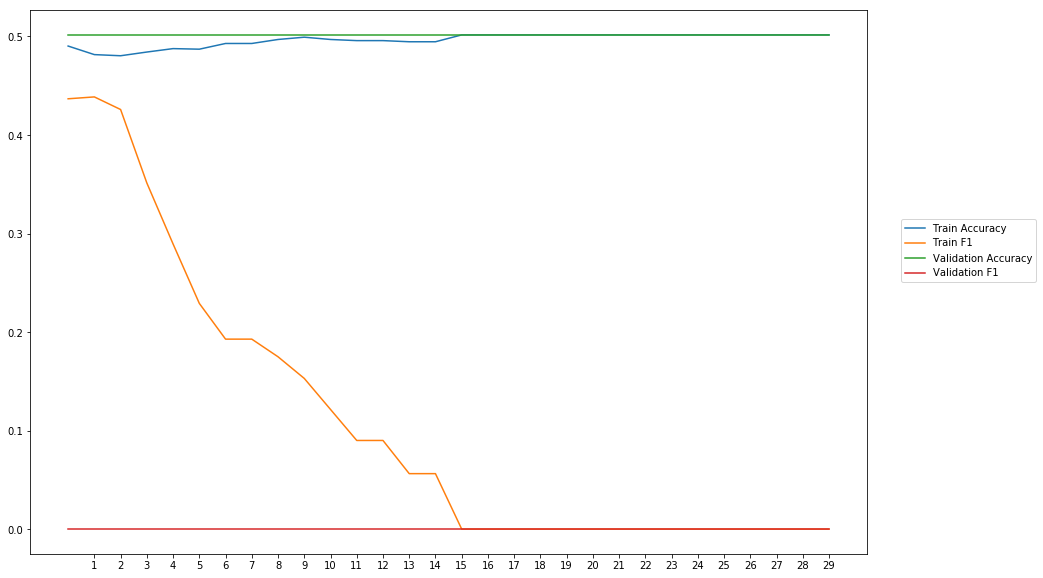

Average Accuracy: 50.13%
Average Precision: 0.00%
Average Recall: 0.00%
Average F1: 0.00%

-----Fold 6--------


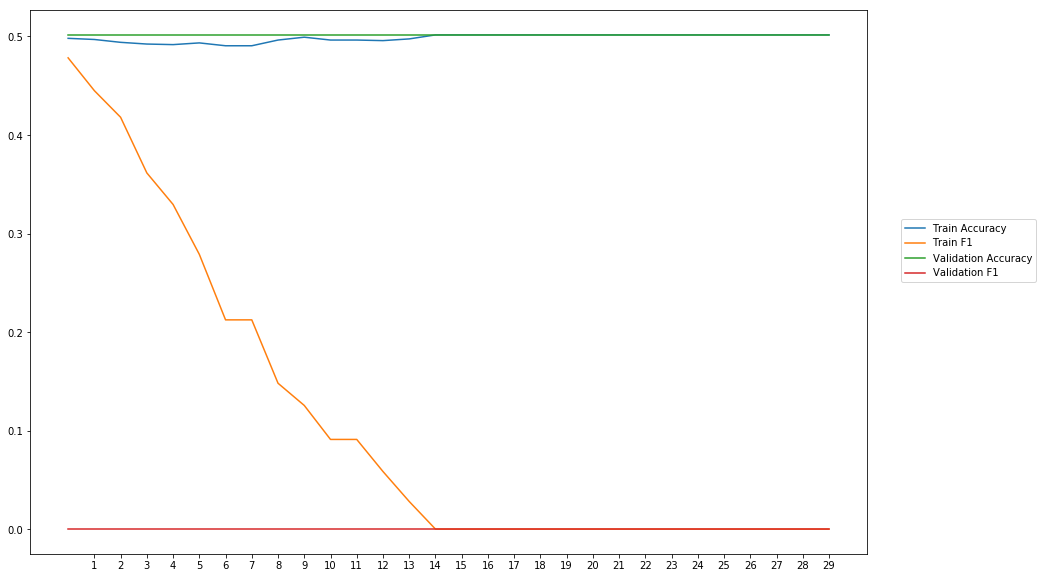

Average Accuracy: 50.13%
Average Precision: 0.00%
Average Recall: 0.00%
Average F1: 0.00%

-----Fold 7--------


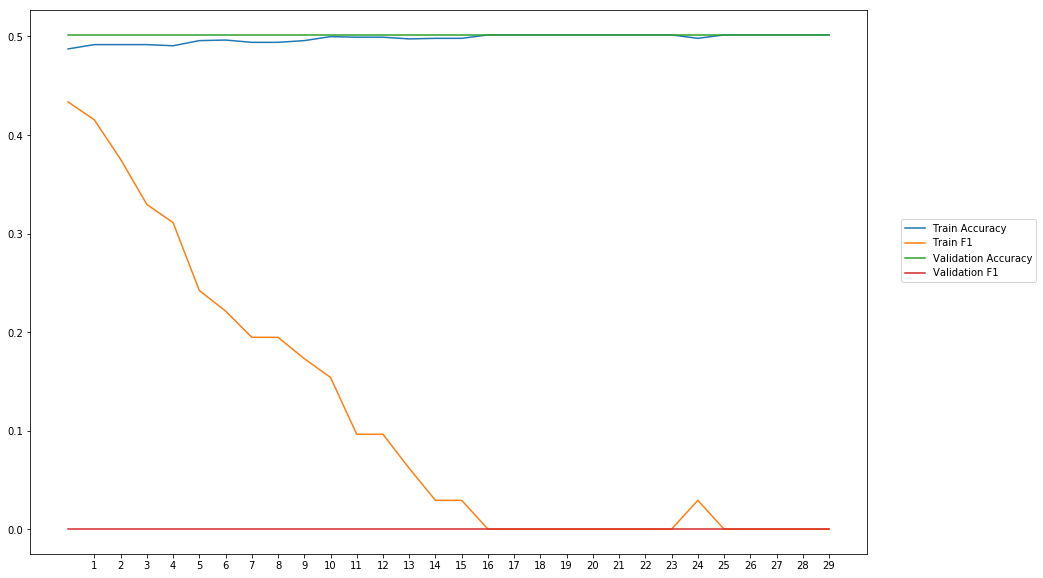

Average Accuracy: 50.13%
Average Precision: 0.00%
Average Recall: 0.00%
Average F1: 0.00%

-----Fold 8--------


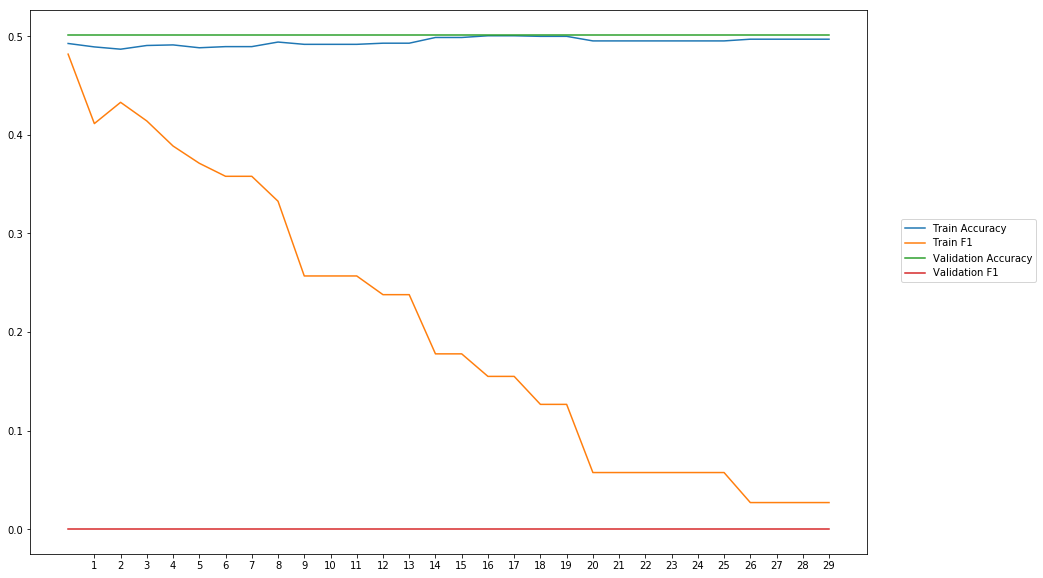

Average Accuracy: 50.13%
Average Precision: 0.00%
Average Recall: 0.00%
Average F1: 0.00%

-----Fold 9--------


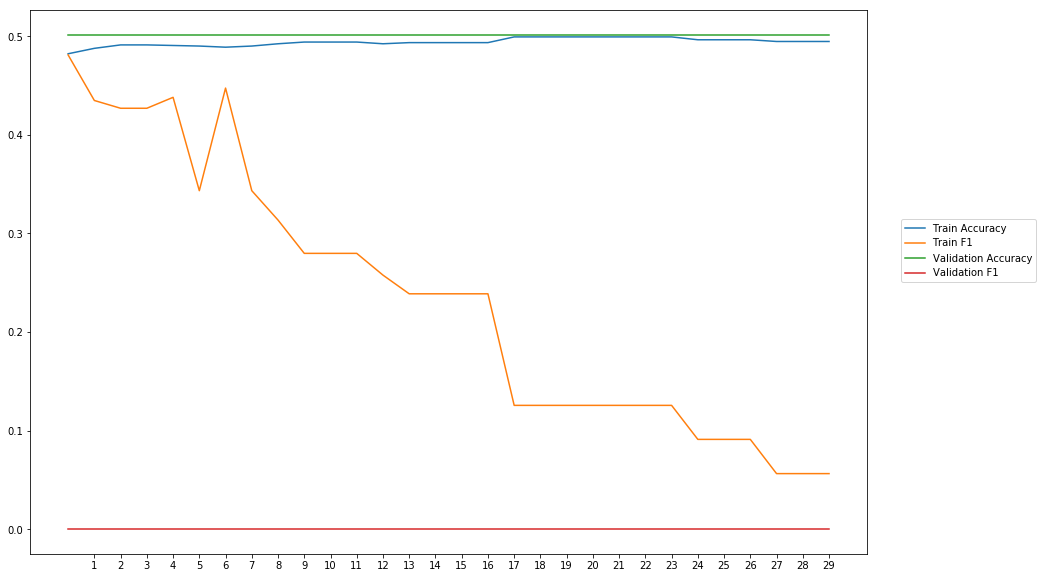

Average Accuracy: 50.13%
Average Precision: 0.00%
Average Recall: 0.00%
Average F1: 0.00%

-----Fold 10--------


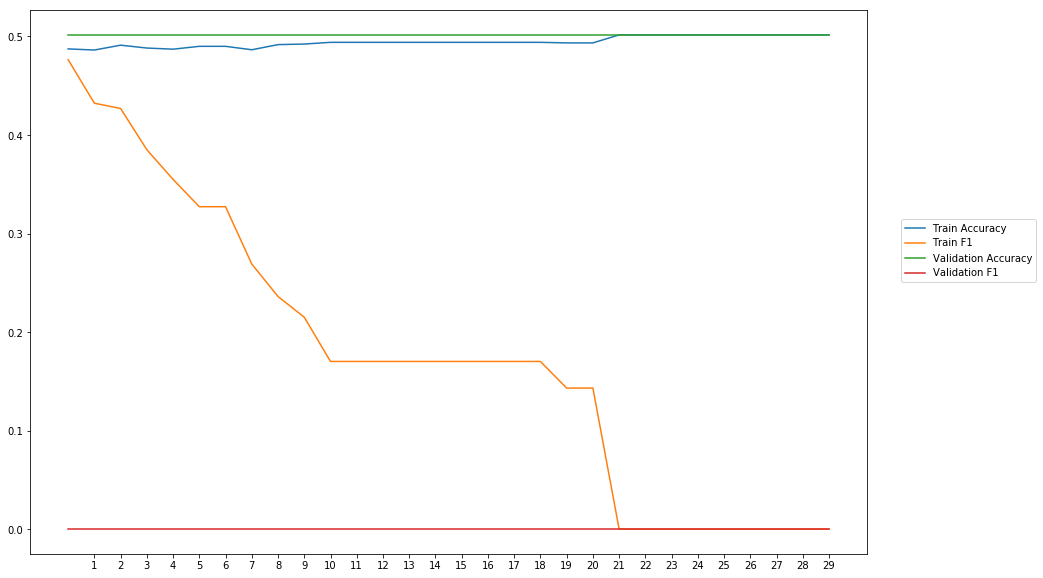

Average Accuracy: 50.13%
Average Precision: 0.00%
Average Recall: 0.00%
Average F1: 0.00%

-------Overallresults-------


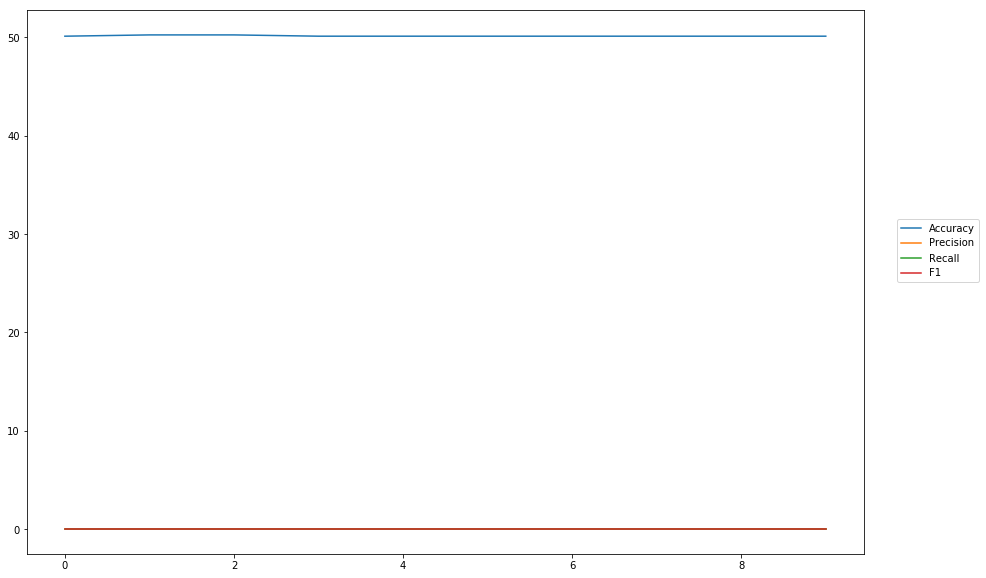

Accuracy: Mean = 50.16% (+/- 0.05%), Max = 50.26%, Min =  50.13%
Precision: Mean = 0.00% (+/- 0.00%), Max = 0.00%, Min =  0.00%
Recall: Mean = 0.00% (+/- 0.00%), Max = 0.00%, Min =  0.00%
F1: Mean = 0.00% (+/- 0.00%), Max = 0.00%, Min =  0.00%


In [12]:
cross_val_three_inputs(model_lemma, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data_lemma, train_senti_blob_lemma, train_pos_lemma, train_labels_lemma, softmax, outputpath, 'lemmasRemoved')

## Combination of the best

In [9]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix_bestpp = np.zeros((len(word_index_bestpp)+1, EMBEDDING_DIM))

for word, i in word_index_bestpp.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix_bestpp[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [10]:
#First part
wv_layer_bestpp = Embedding(len(word_index_bestpp)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_bestpp],
                 input_length=MAX_SEQUENCE_LENGTH_bestpp,
                 trainable=True)

comment_input_bestpp = Input(shape=(MAX_SEQUENCE_LENGTH_bestpp,), dtype='float32')
embedded_sequences_bestpp = wv_layer_bestpp(comment_input_bestpp)
x_first_bestpp = Dense(600, activation='relu')(embedded_sequences_bestpp)
x_first_bestpp = Flatten()(x_first_bestpp)

#Second part
senti_input_bestpp_blob = Input(shape=(MAX_SEQUENCE_LENGTH_bestpp,), dtype='float')
x_second_bestpp = Dense(600, activation='relu')(senti_input_bestpp_blob)

#Thrid part
senti_input_bestpp_pos = Input(shape=(MAX_SEQUENCE_LENGTH_bestpp,), dtype='float')
x_third_bestpp = Dense(600, activation='relu')(senti_input_bestpp_pos)

#Concatination
concat_bestpp = concatenate([x_first_bestpp, x_second_bestpp, x_third_bestpp])

preds_bestpp = Dense(2, activation='softmax')(concat_bestpp)

model_bestpp = Model(inputs=[comment_input_bestpp, senti_input_bestpp_blob, senti_input_bestpp_pos], outputs=preds_bestpp)
model_bestpp.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 33)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 33, 300)      3447000     input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 33, 600)      180600      embedding_1[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 33)           0                                            
__________________________________________________________________________________________________
input_3 (I


-----Fold 1--------


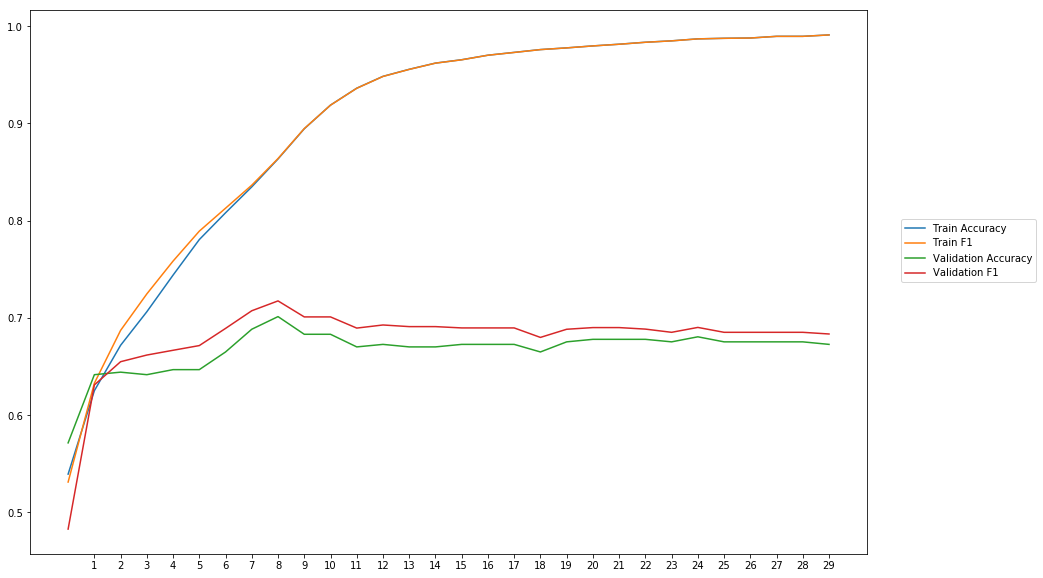

Average Accuracy: 66.73%
Average Precision: 65.29%
Average Recall: 70.89%
Average F1: 67.85%

-----Fold 2--------


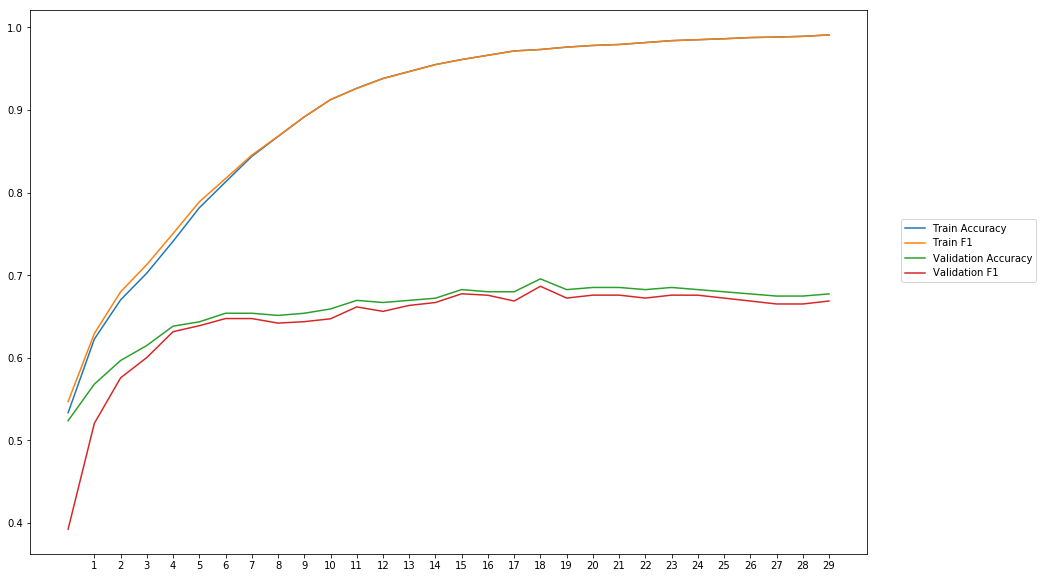

Average Accuracy: 65.84%
Average Precision: 66.42%
Average Recall: 62.71%
Average F1: 64.41%

-----Fold 3--------


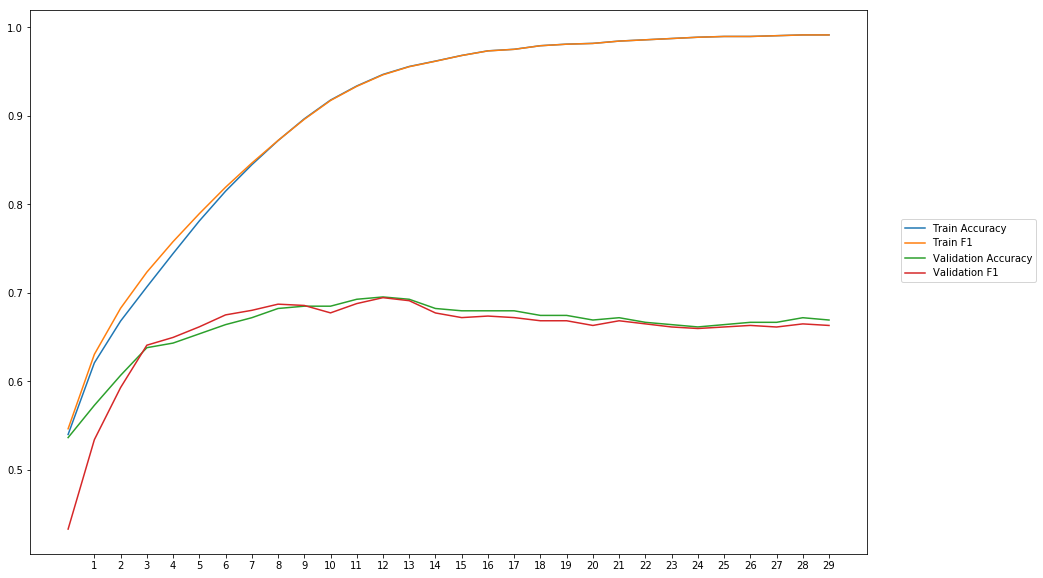

Average Accuracy: 66.21%
Average Precision: 66.21%
Average Recall: 65.03%
Average F1: 65.52%

-----Fold 4--------


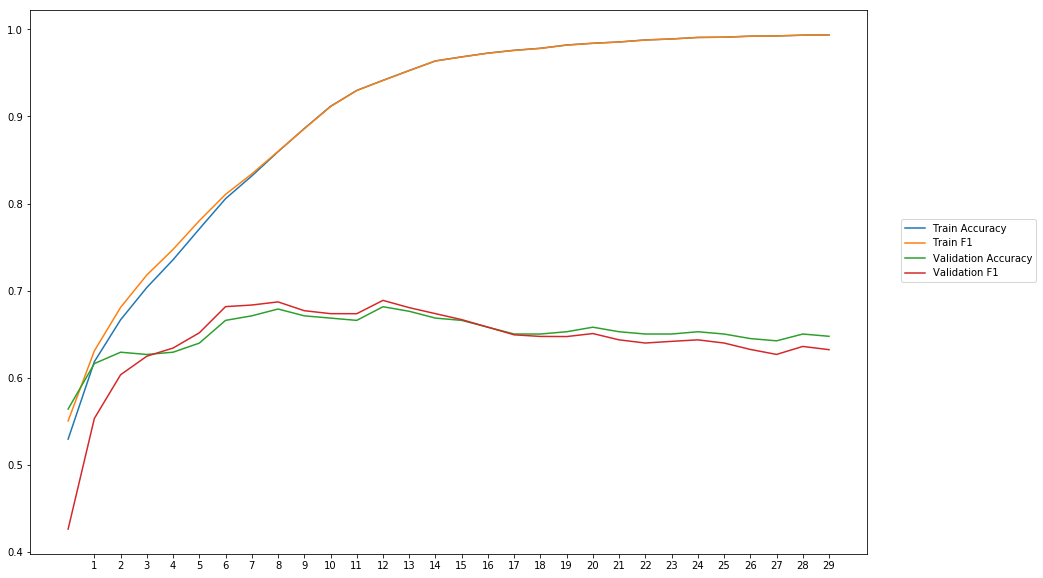

Average Accuracy: 65.09%
Average Precision: 65.40%
Average Recall: 63.54%
Average F1: 64.22%

-----Fold 5--------


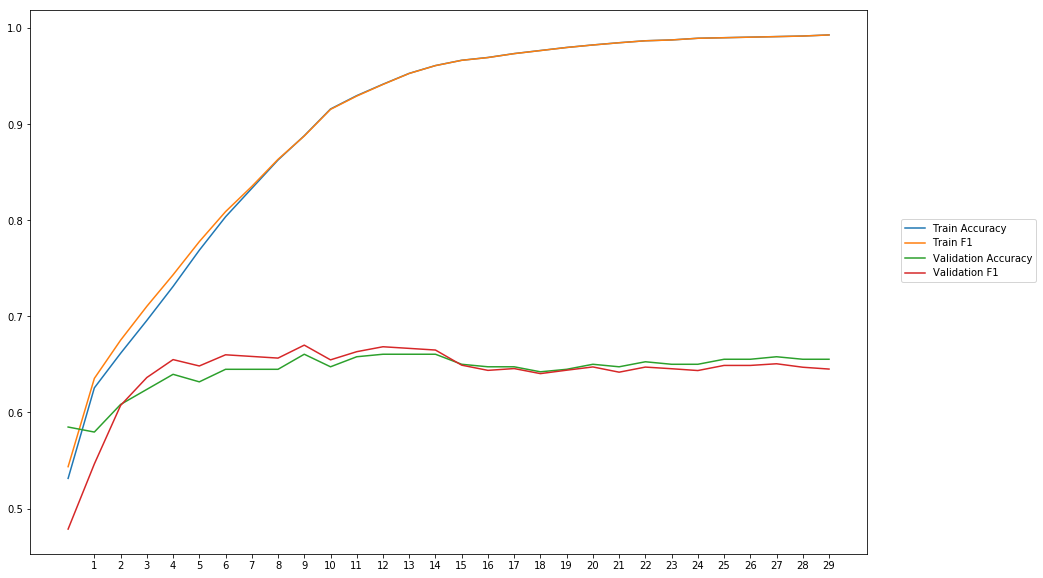

Average Accuracy: 64.38%
Average Precision: 64.34%
Average Recall: 64.14%
Average F1: 64.08%

-----Fold 6--------


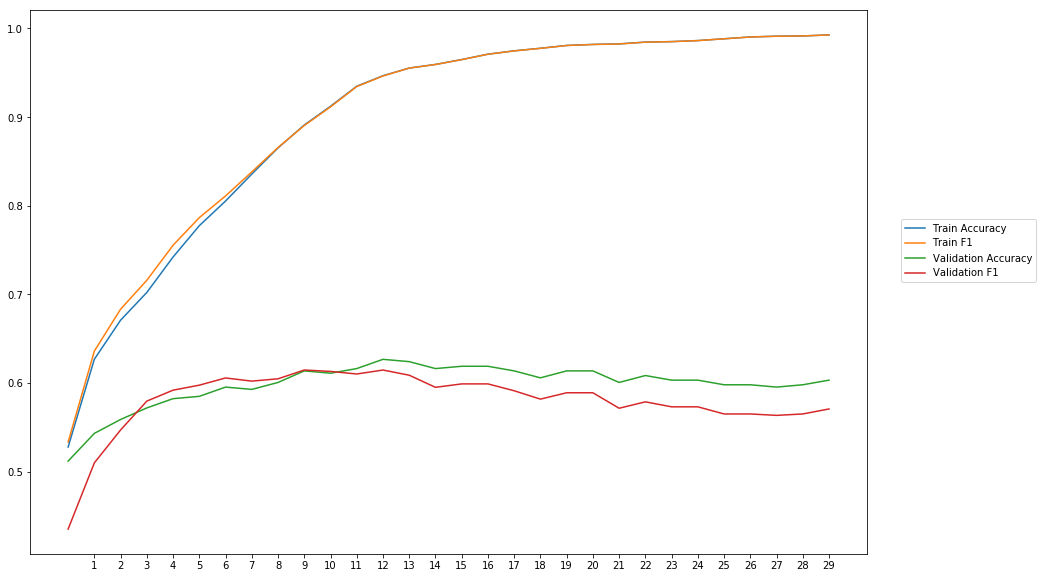

Average Accuracy: 59.80%
Average Precision: 60.51%
Average Recall: 55.90%
Average F1: 58.01%

-----Fold 7--------


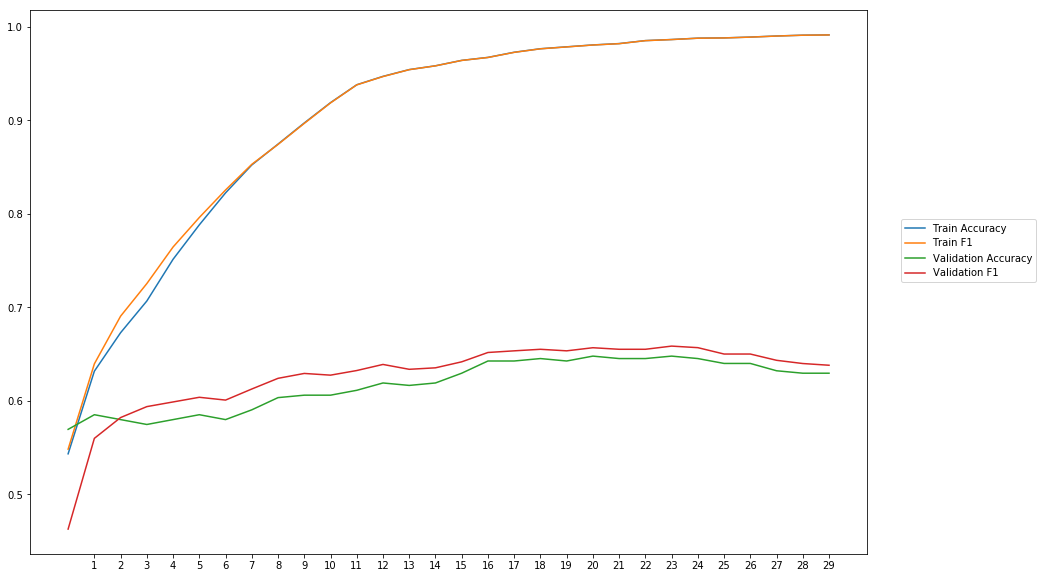

Average Accuracy: 61.74%
Average Precision: 61.01%
Average Recall: 64.64%
Average F1: 62.62%

-----Fold 8--------


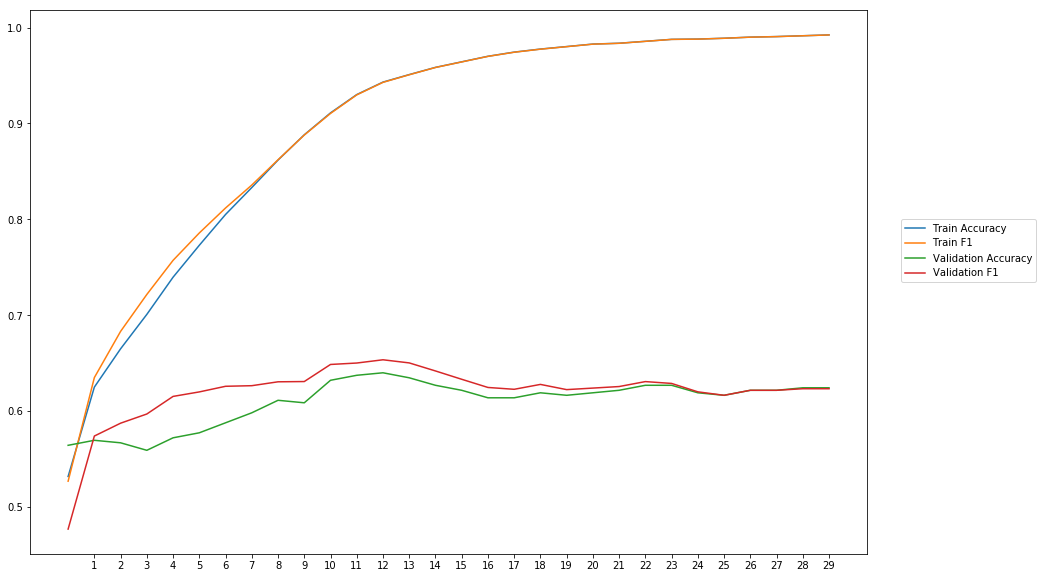

Average Accuracy: 60.95%
Average Precision: 60.30%
Average Recall: 64.01%
Average F1: 61.96%

-----Fold 9--------


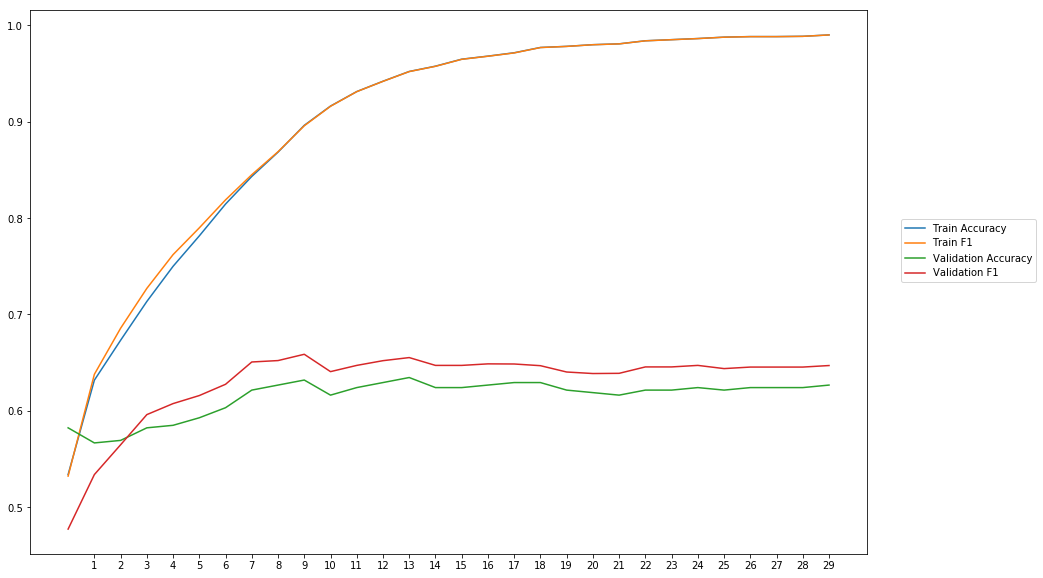

Average Accuracy: 61.47%
Average Precision: 60.36%
Average Recall: 66.30%
Average F1: 62.99%

-----Fold 10--------


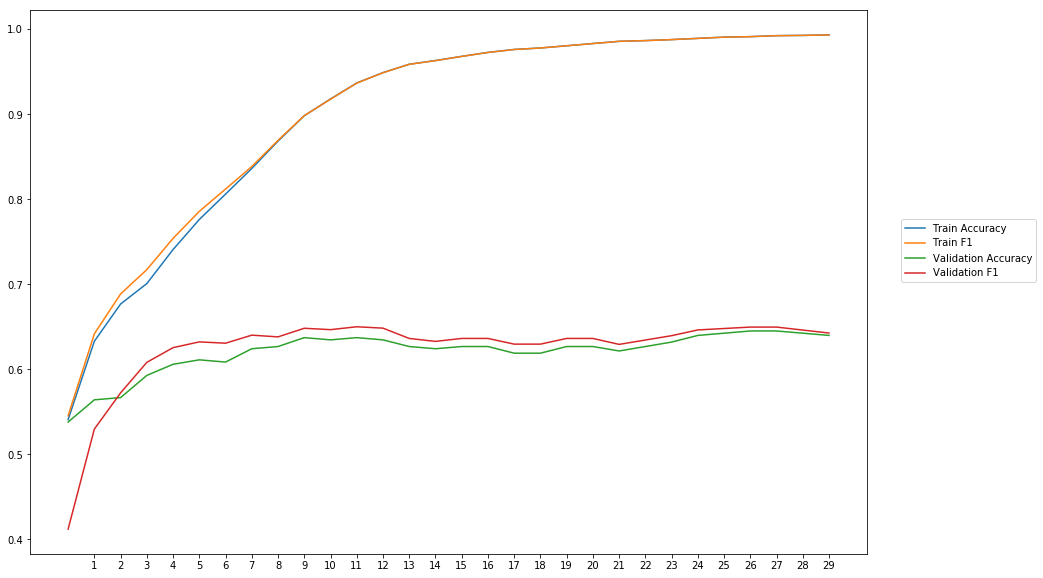

Average Accuracy: 62.03%
Average Precision: 61.40%
Average Recall: 63.87%
Average F1: 62.46%

-------Overallresults-------


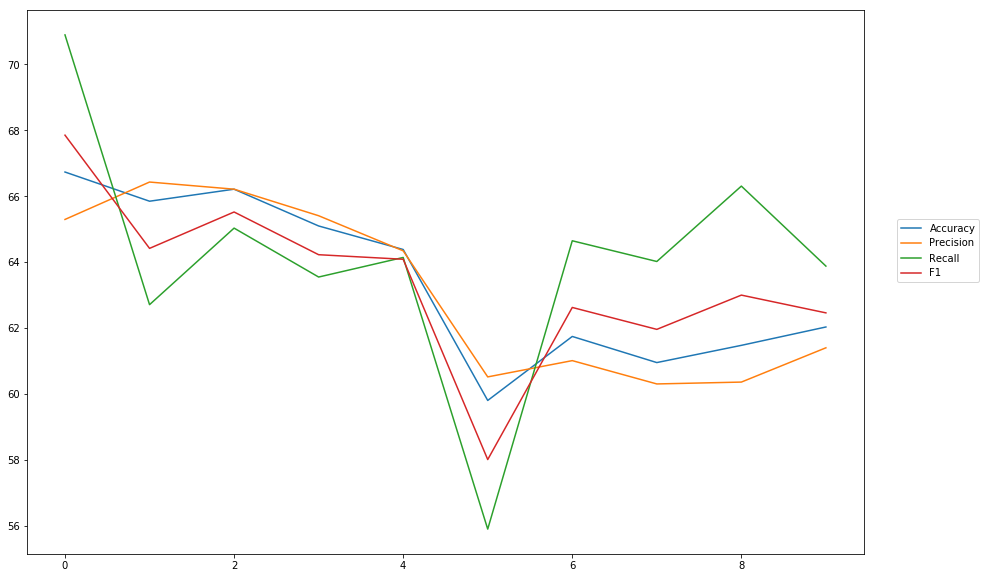

Accuracy: Mean = 63.42% (+/- 2.37%), Max = 66.73%, Min =  59.80%
Precision: Mean = 63.12% (+/- 2.48%), Max = 66.42%, Min =  60.30%
Recall: Mean = 64.10% (+/- 3.49%), Max = 70.89%, Min =  55.90%
F1: Mean = 63.41% (+/- 2.43%), Max = 67.85%, Min =  58.01%


In [11]:
cross_val_three_inputs(model_bestpp, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data_bestpp, train_senti_blob_bestpp, train_pos_bestpp, train_labels_bestpp, softmax, outputpath, 'bestppsRemoved')

## With usermentions

In [9]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix_username = np.zeros((len(word_index_username)+1, EMBEDDING_DIM))

for word, i in word_index_username.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix_username[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [10]:
#First part
wv_layer_username = Embedding(len(word_index_username)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_username],
                 input_length=MAX_SEQUENCE_LENGTH_username,
                 trainable=True)

comment_input_username = Input(shape=(MAX_SEQUENCE_LENGTH_username,), dtype='float32')
embedded_sequences_username = wv_layer_username(comment_input_username)
x_first_username = Dense(600, activation='relu')(embedded_sequences_username)
x_first_username = Flatten()(x_first_username)

#Second part
senti_input_username_blob = Input(shape=(MAX_SEQUENCE_LENGTH_username,), dtype='float')
x_second_username = Dense(600, activation='relu')(senti_input_username_blob)

#Thrid part
senti_input_username_pos = Input(shape=(MAX_SEQUENCE_LENGTH_username,), dtype='float')
x_third_username = Dense(600, activation='relu')(senti_input_username_pos)

#Concatination
concat_username = concatenate([x_first_username, x_second_username, x_third_username])

preds_username = Dense(2, activation='softmax')(concat_username)

model_username = Model(inputs=[comment_input_username, senti_input_username_blob, senti_input_username_pos], outputs=preds_username)
model_username.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 300)      4119900     input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 40, 600)      180600      embedding_1[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
input_3 (I


-----Fold 1--------


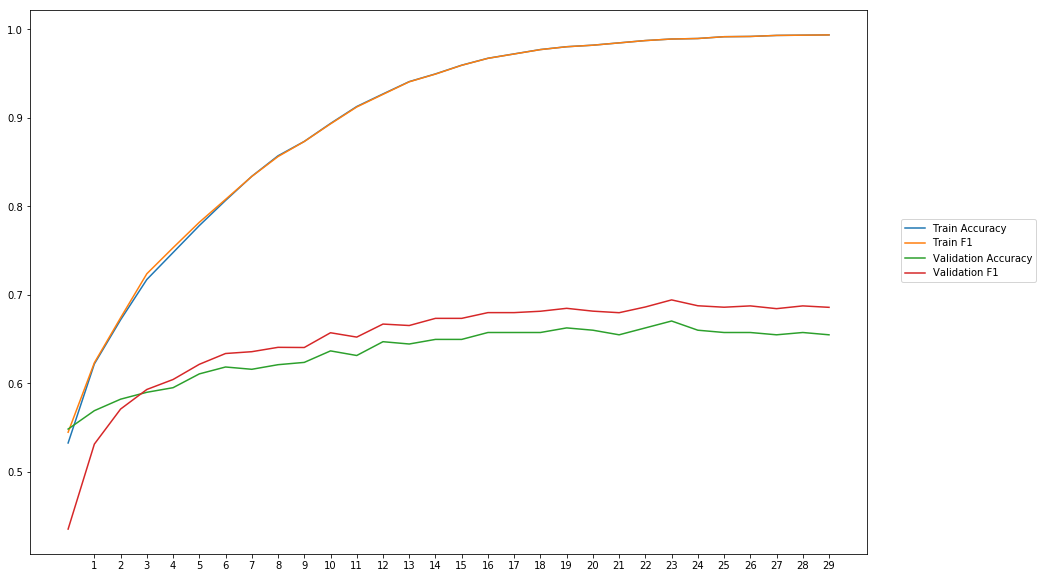

Average Accuracy: 63.50%
Average Precision: 61.97%
Average Recall: 68.63%
Average F1: 64.91%

-----Fold 2--------


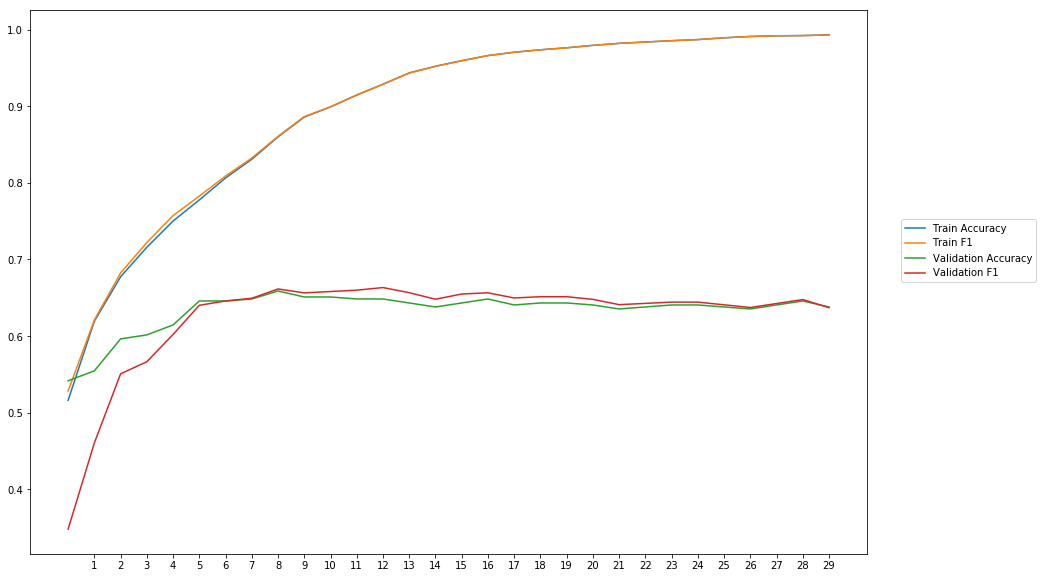

Average Accuracy: 63.33%
Average Precision: 63.10%
Average Recall: 62.71%
Average F1: 62.52%

-----Fold 3--------


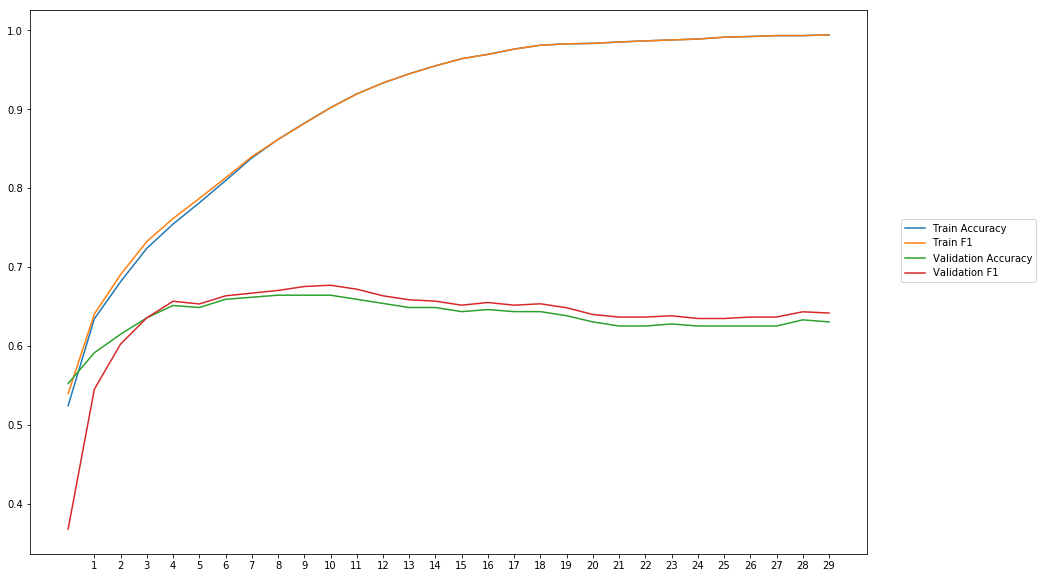

Average Accuracy: 63.66%
Average Precision: 63.06%
Average Recall: 64.89%
Average F1: 63.65%

-----Fold 4--------


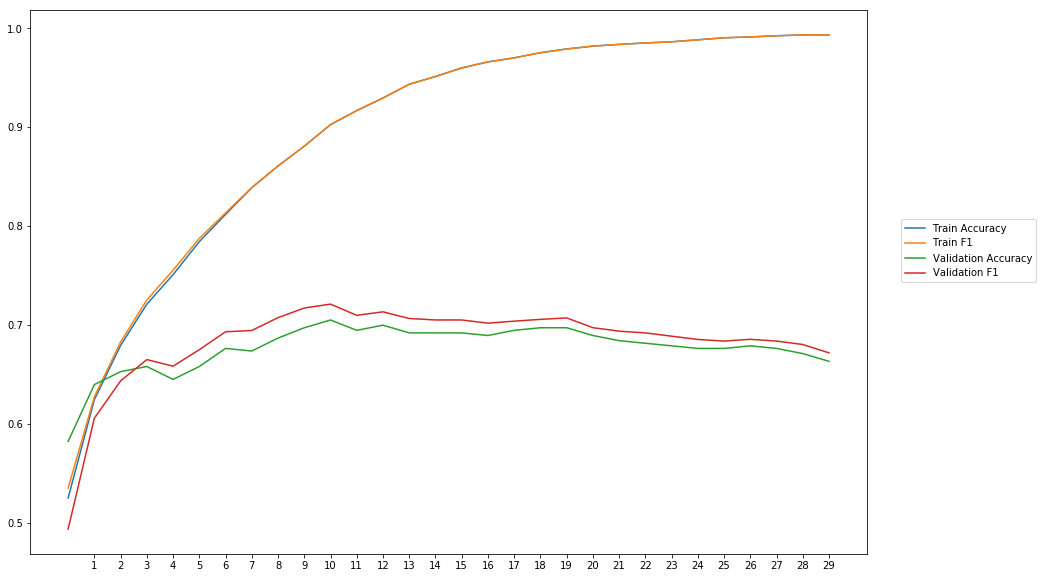

Average Accuracy: 67.66%
Average Precision: 66.55%
Average Recall: 70.49%
Average F1: 68.31%

-----Fold 5--------


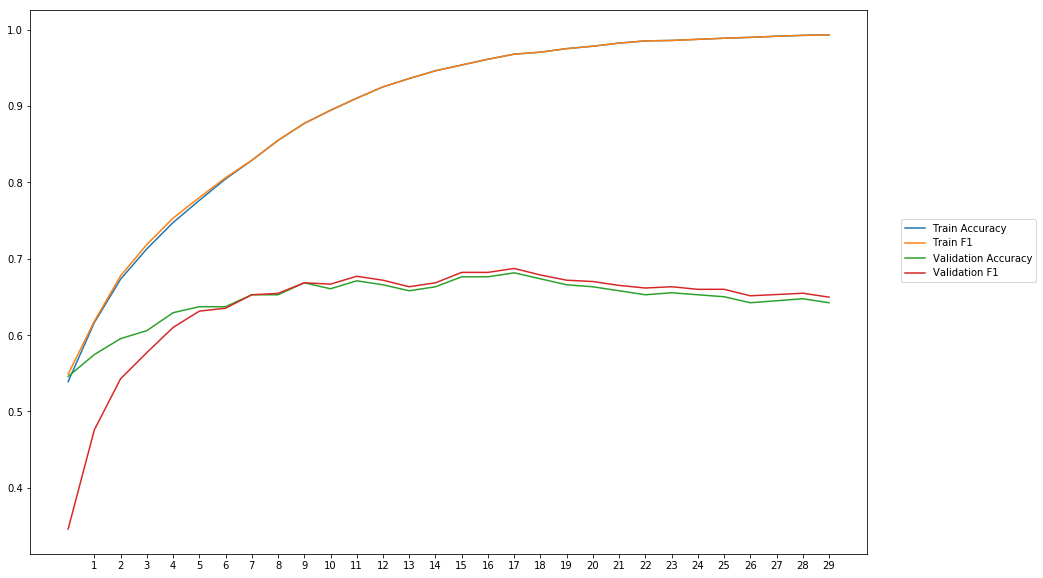

Average Accuracy: 64.66%
Average Precision: 64.67%
Average Recall: 63.72%
Average F1: 63.77%

-----Fold 6--------


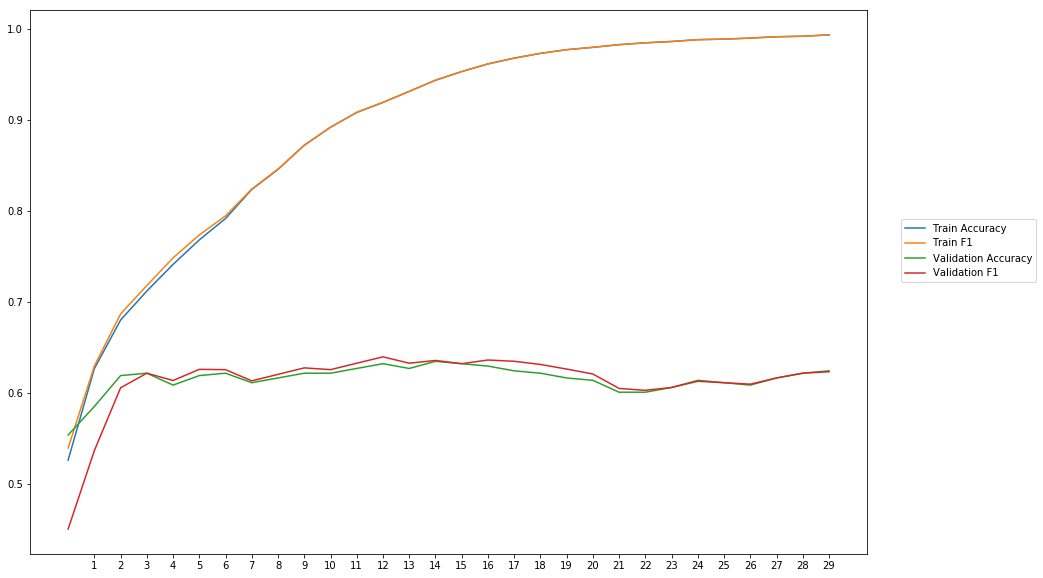

Average Accuracy: 61.51%
Average Precision: 61.36%
Average Recall: 61.48%
Average F1: 61.30%

-----Fold 7--------


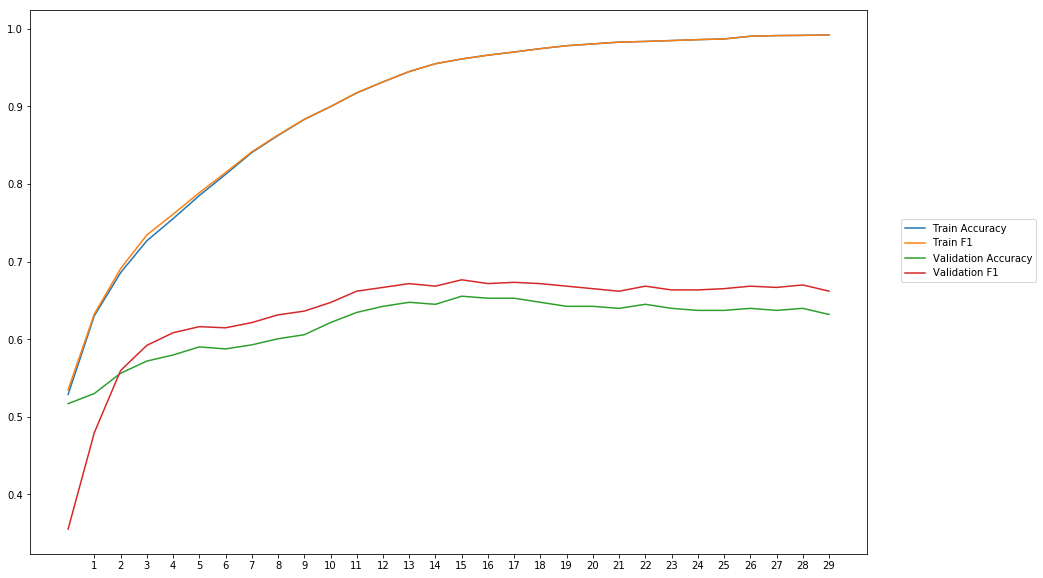

Average Accuracy: 61.87%
Average Precision: 60.31%
Average Recall: 67.59%
Average F1: 63.48%

-----Fold 8--------


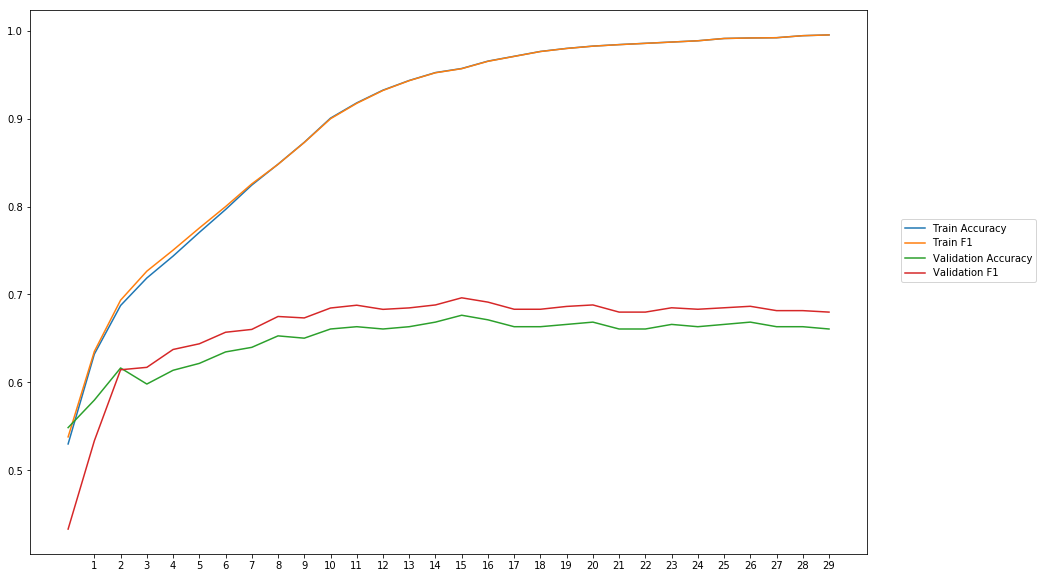

Average Accuracy: 64.83%
Average Precision: 63.27%
Average Recall: 69.70%
Average F1: 66.13%

-----Fold 9--------


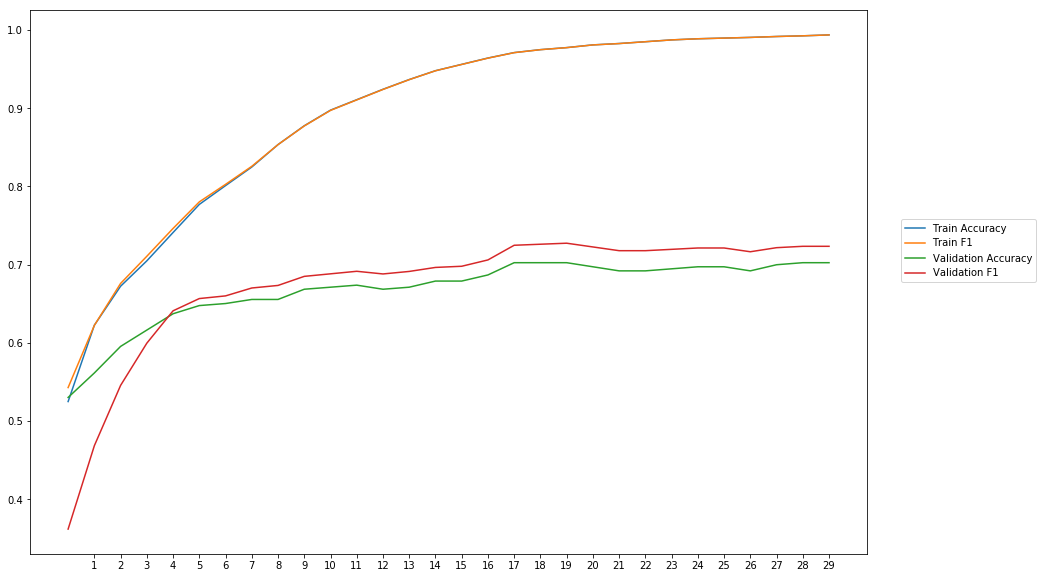

Average Accuracy: 66.73%
Average Precision: 65.01%
Average Recall: 70.79%
Average F1: 67.34%

-----Fold 10--------


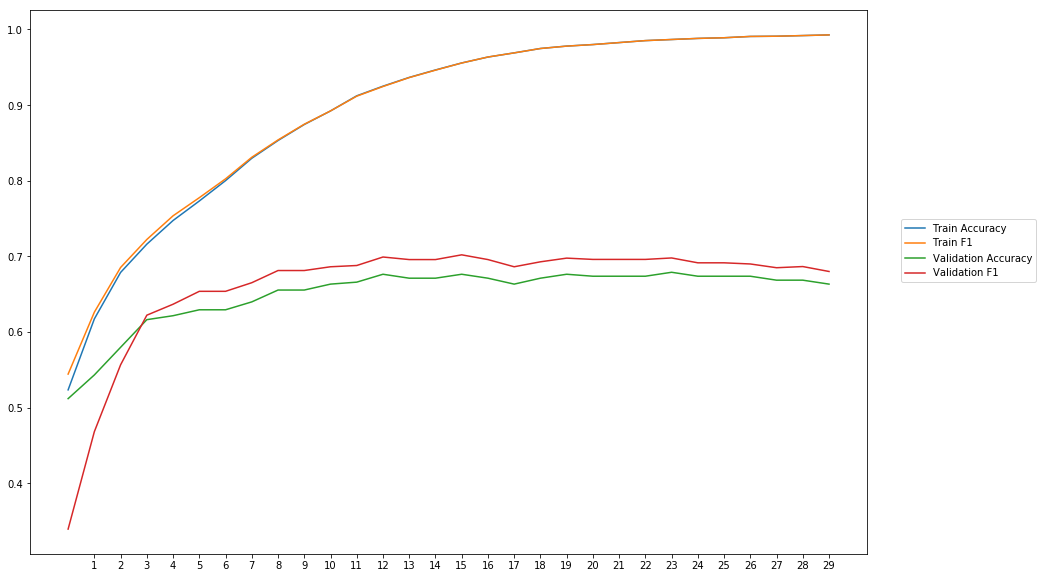

Average Accuracy: 65.02%
Average Precision: 63.27%
Average Recall: 69.72%
Average F1: 66.01%

-------Overallresults-------


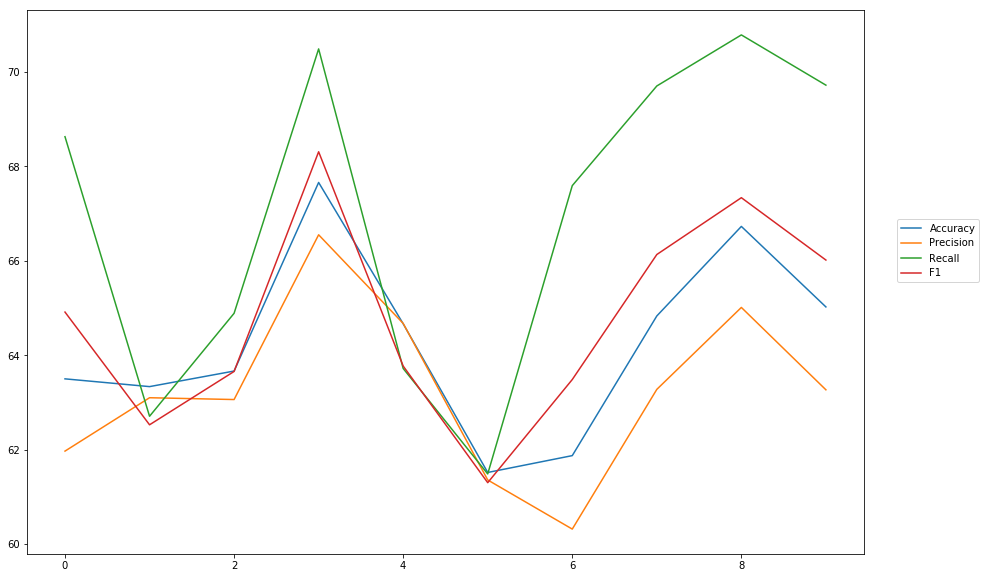

Accuracy: Mean = 64.28% (+/- 1.84%), Max = 67.66%, Min =  61.51%
Precision: Mean = 63.26% (+/- 1.73%), Max = 66.55%, Min =  60.31%
Recall: Mean = 66.97% (+/- 3.29%), Max = 70.79%, Min =  61.48%
F1: Mean = 64.74% (+/- 2.09%), Max = 68.31%, Min =  61.30%


In [11]:
cross_val_three_inputs(model_username, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data_username, train_senti_blob_username, train_pos_username, train_labels_username, softmax, outputpath, 'usernamesRemoved')

# Test the best model with the heldout dataset

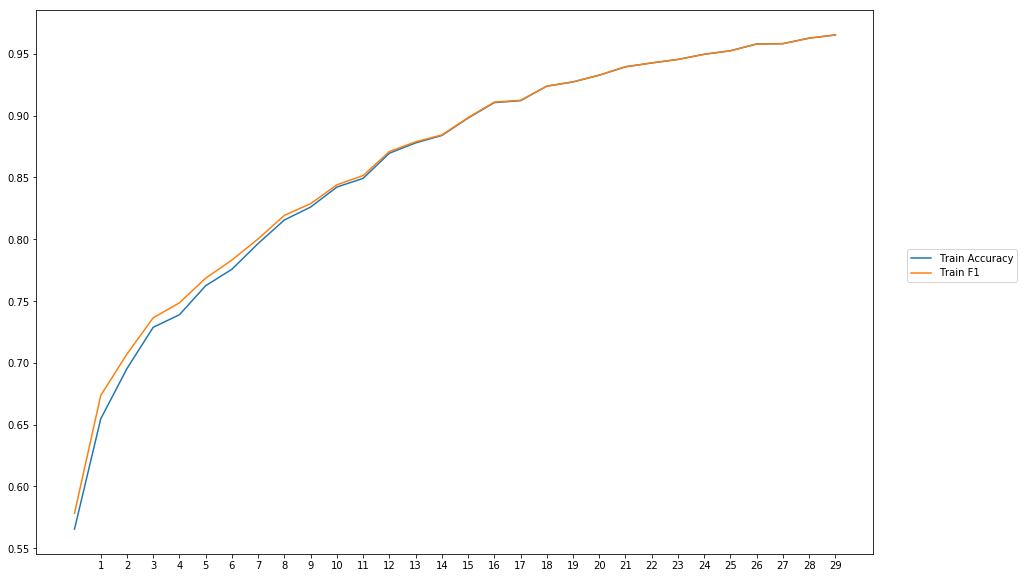


-----Test Scores----
Loss: 0.5892210785223513
Accuracy: 68.36734693877551
Precision: 58.267716520139714
Recall: 71.38263663299594
F1: 64.16184474360192


In [11]:
train_evaluate_three_inputs(model_username, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data_username, train_senti_blob_username, train_pos_username, train_labels_username, test_data_username, test_senti_blob_username, test_pos_username, test_labels_username, softmax, outputpath, 'final_Preprocessing_username')